# Load packages and data

In [2]:
## Install and import packages
# Darts: https://unit8co.github.io/darts/README.html
!pip install darts
!pip install dask[dataframe]

from google.colab import drive
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

from darts.timeseries import TimeSeries
from darts.models import NaiveMean, NaiveSeasonal, NaiveDrift, NaiveMovingAverage, LinearRegressionModel, AutoARIMA
from darts.models import RandomForest, LightGBMModel, XGBModel
from darts.models import RNNModel
#from darts.utils.timeseries_generation import holidays_timeseries, datetime_attribute_timeseries
from darts.utils import statistics
from darts.metrics import rmse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 10.8 MB/s eta 0:00:

In [ ]:
!pip install optuna
!pip install optuna_integration
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 1.1 MB/s eta 0:00:00


In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
## Load data
path = '/content/drive/My Drive/Erdos/dengue_data'
df = pd.read_csv(os.path.join(path, 'BD_combined_new.csv'))

# EDA

Let's take a look at the data. Note some preprocessing / clean-up has already been done on it previously.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             192 non-null    object 
 1   temp_2m_mean     192 non-null    float64
 2   appar_temp_mean  192 non-null    float64
 3   rain_sum         192 non-null    float64
 4   goog_trends      192 non-null    int64  
 5   case             192 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.1+ KB


In [ ]:
df.head()

date  temp_2m_mean  appar_temp_mean  rain_sum  goog_trends  case
0  2008-01-01     22.757732        25.196896  3.820457            2     0
1  2008-02-01     20.662600        21.795855  1.800029            0     0
2  2008-03-01     20.317026        20.951399  0.949409            0     0
3  2008-04-01     22.066017        23.307356  1.117167            0     0
4  2008-05-01     24.750021        27.194162  1.865188            2     0

In [ ]:
## Convert date field into datetime object
df['date'] = pd.to_datetime(df['date'])

cols = df.columns.tolist()

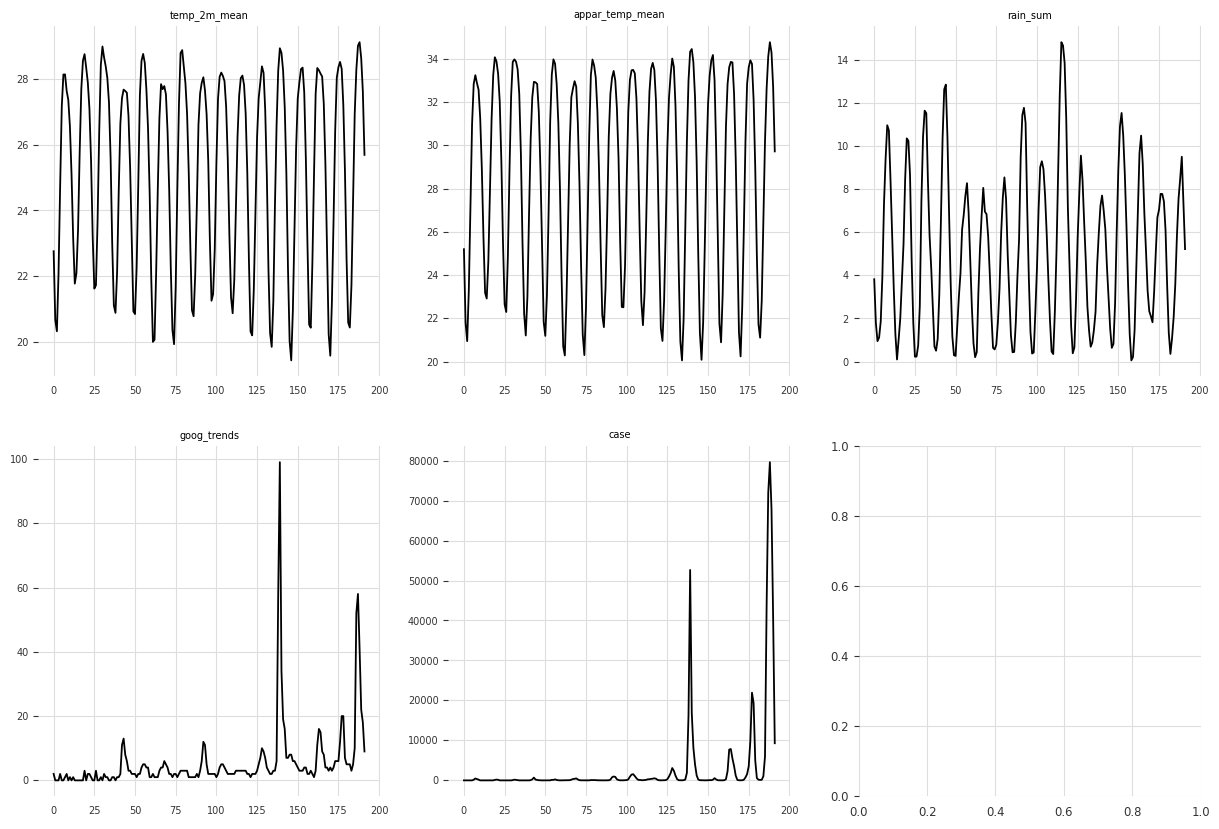

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

for k in range(1,6):
  i = (k-1)//3
  j = (k-1)%3
  axs[i,j].plot(df[cols[k]],)
  axs[i,j].set_title(cols[k],size=7)
  axs[i,j].tick_params(axis='both', which='major', labelsize=7)
  axs[i,j].tick_params(axis='both', which='minor', labelsize=5)

In [ ]:
df.corr()

date  temp_2m_mean  appar_temp_mean  rain_sum  \
date             1.000000      0.007473         0.031027  0.031935   
temp_2m_mean     0.007473      1.000000         0.992262  0.845130   
appar_temp_mean  0.031027      0.992262         1.000000  0.880395   
rain_sum         0.031935      0.845130         0.880395  1.000000   
goog_trends      0.377799      0.315251         0.316291  0.216992   
case             0.356004      0.278008         0.275526  0.180182   

                 goog_trends      case  
date                0.377799  0.356004  
temp_2m_mean        0.315251  0.278008  
appar_temp_mean     0.316291  0.275526  
rain_sum            0.216992  0.180182  
goog_trends         1.000000  0.783459  
case                0.783459  1.000000

Google Trends data appears to correlate quite strongly with case numbers. Weather covariates appear to have some positive correlation with case numbers, although not as strong. There is also a strong seasonal component to the weather covariates, which makes sense.

# Preprocessing

In [ ]:
series = TimeSeries.from_dataframe(df, time_col='date')

We scale the data for better performance

In [ ]:
case_max = df["case"].max()

In [ ]:
from darts.dataprocessing.transformers.scaler import Scaler
normalizer = Scaler()
series = normalizer.fit_transform(series)

We set up a train / validation / test split (70% / 10% / 20%)

In [ ]:
## Parameters and training data
frac_train = 0.7
frac_valid = 0.1

train, test = series.split_before(frac_train+frac_valid)
tt, ho = train.split_before(frac_train/(frac_train+frac_valid))

horizon = len(ho)
target = tt['case']
refline = train['case']

In [ ]:
len(tt), len(ho), len(test)

(132, 20, 40)

In [ ]:
statistics.check_seasonality(tt['case'])

(True, 12)

In [ ]:
statistics.stationarity_tests(train['case'])

True

We set up functions to streamline training and validation of various models using Darts.

These models will be evaluated using RMSE on the validation set.

In [ ]:
def evaluate_model_plain(name, model, target, horizon, refline, compare):
  fitted_model = model.fit(target)
  preds = fitted_model.predict(horizon)
  plt.figure()
  refline.plot()
  preds['case'].plot(label=name+" forecast", low_quantile=0.10, high_quantile=0.90)
  plt.legend()
  print(name + " : " + str(rmse(preds['case'], compare)))

def evaluate_model(name, model, target, horizon, fitcovs, predcovs, refline, compare):
  fitted_model = model.fit(target,future_covariates=fitcovs)
  preds = fitted_model.predict(horizon,future_covariates=predcovs)
  plt.figure()
  refline.plot()
  preds['case'].plot(label=name+" forecast", low_quantile=0.10, high_quantile=0.90)
  plt.legend()
  print(name + " : " + str(rmse(preds['case'], compare)))

# Baseline models

We first try a variety of baseline models, not using any of the covariates.

NaiveMean : 0.16292671014276564
NaiveDrift : 0.16247312672651362
NaiveMovingAverage : 0.16119943377357096
NaiveSeasonal : 0.15531752932299508


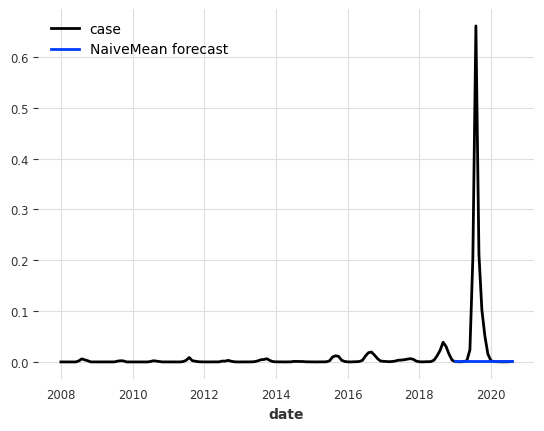

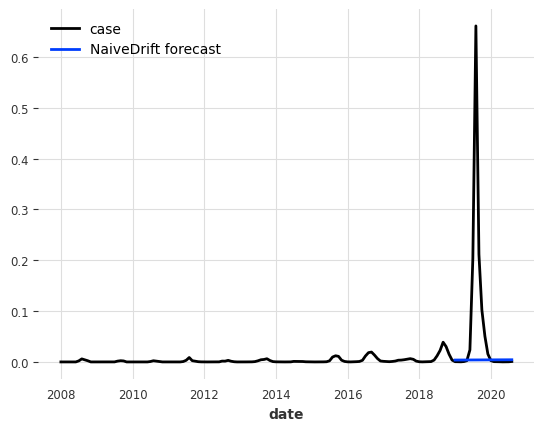

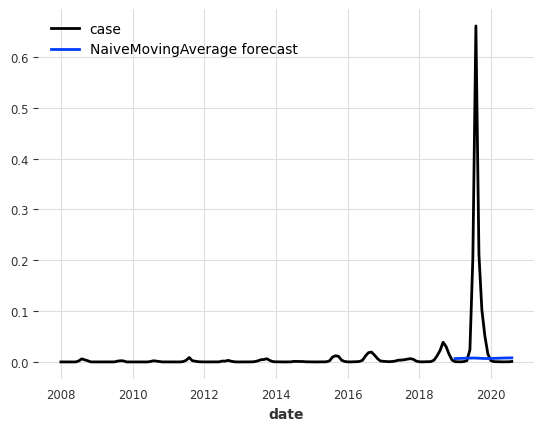

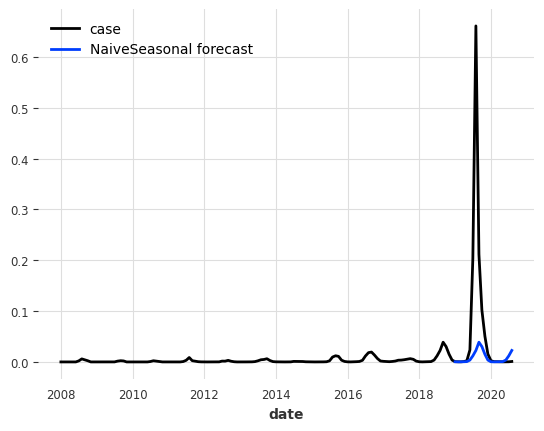

In [ ]:
# Baseline models not using any covariates
# Do not expect these to be any good, really ...

## NaiveMean
evaluate_model_plain("NaiveMean", NaiveMean(), tt, horizon, refline, ho['case'])

## NaiveDrift
evaluate_model_plain("NaiveDrift", NaiveDrift(), tt, horizon, refline, ho['case'])

## NaiveMovingAverage
evaluate_model_plain("NaiveMovingAverage", NaiveMovingAverage(input_chunk_length=36), tt, horizon, refline, ho['case'])

## NaiveSeasonal
evaluate_model_plain("NaiveSeasonal", NaiveSeasonal(K=12), tt, horizon, refline, ho['case'])

Next we try some "baseline" models which do make use of the covariates: this includes a simple linear regression, as well as a SARIMAX model.

In [ ]:
cols = df.columns.tolist()

LinearRegressionModel : 0.14615557334718832


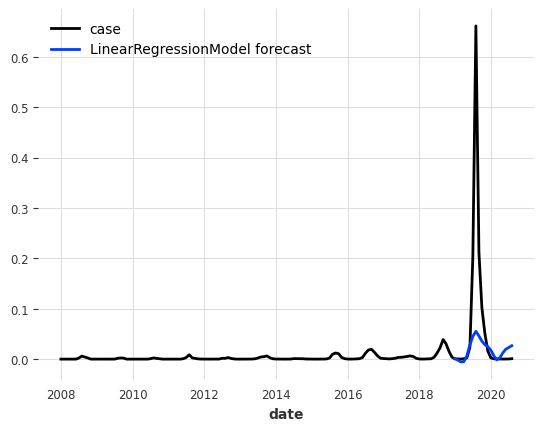

In [ ]:
## Now with covariates
# LinearRegressionModel
mod_LinearRegress = LinearRegressionModel(lags=36, lags_future_covariates=[0], output_chunk_length=horizon)
evaluate_model("LinearRegressionModel", mod_LinearRegress, target, horizon,
               tt[cols[1:-1]], ho[cols[1:-1]], refline, ho['case'])



This somehow doesn't do significantly better than the naive seasonal.

AutoARIMA : 0.147686791539432


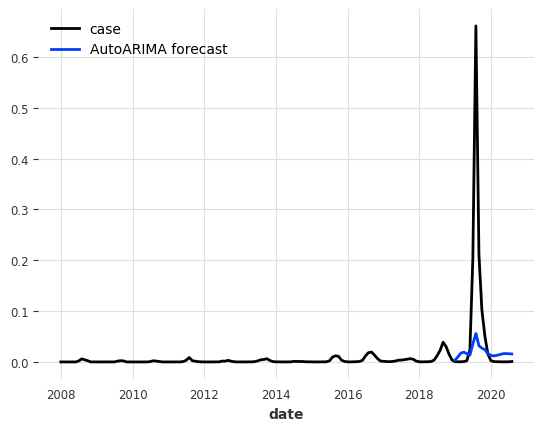

In [ ]:
## ARIMA
mod_ARIMA = AutoARIMA(m=12).fit(target,future_covariates=tt[cols[1:-1]])
evaluate_model("AutoARIMA", mod_ARIMA, target, horizon,
               tt[cols[1:-1]], ho[cols[1:-1]], refline, ho['case'])

The SARIMAX model doesn't do significantly better than the naive seasonal either ..

Next we try some more sophisticated models which are still not neural networks

RandomForest : 0.16097123044829773
LightGBMModel : 0.16171524952130076
XGBModel : 0.162060453124327


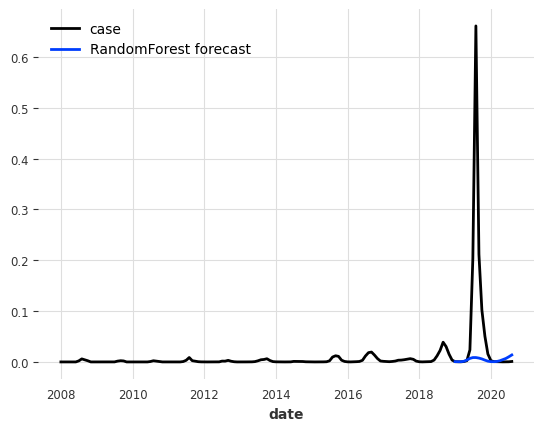

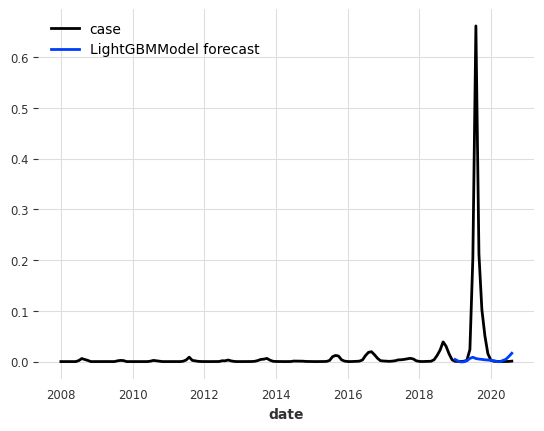

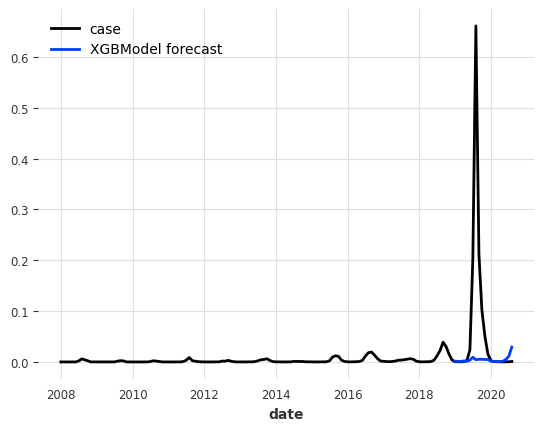

In [ ]:
## RandomForest
mod_RandomForest = RandomForest(lags=10, lags_future_covariates=[0],
                                output_chunk_length=horizon, n_estimators=10,
                                criterion='squared_error')
evaluate_model("RandomForest", mod_RandomForest, target, horizon,
               tt[cols[1:-1]], ho[cols[1:-1]], refline, ho['case'])

## LightGBMModel
mod_LightGBMModel = LightGBMModel(lags=10, lags_future_covariates=[0],
                                  output_chunk_length=horizon, verbose=-1)
evaluate_model("LightGBMModel", mod_LightGBMModel, target, horizon,
               tt[cols[1:-1]], ho[cols[1:-1]], refline, ho['case'])

## XGBModel
mod_XGBModel = XGBModel(lags=10, lags_future_covariates=[0], output_chunk_length=horizon)
evaluate_model("XGBModel", mod_XGBModel, target, horizon,
               tt[cols[1:-1]], ho[cols[1:-1]], refline, ho['case'])

Those did even worse ...

# Hyperparameter tuning

We do hyperparameter optimization using Optuna.
Everything is probably slightly suboptimal because I can't seem to load checkpoints?

In [ ]:
import torch
import optuna
import pytorch_lightning
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping

from darts.metrics import smape
from darts.utils.likelihood_models import GaussianLikelihood

In [ ]:
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import Callback

class PyTorchLightningPruningCallback(Callback):
    """PyTorch Lightning callback to prune unpromising trials.
    See `the example <https://github.com/optuna/optuna-examples/blob/
    main/pytorch/pytorch_lightning_simple.py>`__
    if you want to add a pruning callback which observes accuracy.
    Args:
        trial:
            A :class:`~optuna.trial.Trial` corresponding to the current evaluation of the
            objective function.
        monitor:
            An evaluation metric for pruning, e.g., ``val_loss`` or
            ``val_acc``. The metrics are obtained from the returned dictionaries from e.g.
            ``pytorch_lightning.LightningModule.training_step`` or
            ``pytorch_lightning.LightningModule.validation_epoch_end`` and the names thus depend on
            how this dictionary is formatted.
    """

    def __init__(self, trial: optuna.trial.Trial, monitor: str) -> None:
        super().__init__()

        self._trial = trial
        self.monitor = monitor

    def on_validation_end(self, trainer: Trainer, pl_module: LightningModule) -> None:
        # When the trainer calls `on_validation_end` for sanity check,
        # do not call `trial.report` to avoid calling `trial.report` multiple times
        # at epoch 0. The related page is
        # https://github.com/PyTorchLightning/pytorch-lightning/issues/1391.
        if trainer.sanity_checking:
            return

        epoch = pl_module.current_epoch

        current_score = trainer.callback_metrics.get(self.monitor)
        if current_score is None:
            message = (
                "The metric '{}' is not in the evaluation logs for pruning. "
                "Please make sure you set the correct metric name.".format(self.monitor)
            )
            warnings.warn(message)
            return

        self._trial.report(current_score, step=epoch)
        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.TrialPruned(message)

In [ ]:
# define objective function
def objectiveR(trial):
    # select input and output chunk lengths
    in_len = trial.suggest_int("in_len", 2, 24)
    out_len = trial.suggest_int("out_len", 1, in_len-1)

    # Other hyperparameters
    # kernel_size = trial.suggest_int("kernel_size", 2, 5)
    # num_filters = trial.suggest_int("num_filters", 1, 5)
    # weight_norm = trial.suggest_categorical("weight_norm", [False, True])
    # dilation_base = trial.suggest_int("dilation_base", 2, 4)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])

    # throughout training we'll monitor the validation loss for both pruning and early stopping
    pruner = PyTorchLightningPruningCallback(trial, monitor="train_loss")
    early_stopper = EarlyStopping("train_loss", min_delta=0.001, patience=3, verbose=True)
    callbacks = [pruner, early_stopper]

    pl_trainer_kwargs = {
        "accelerator": "auto",
        "callbacks": callbacks,
    }

    # optionally also add the (scaled) year value as a past covariate
    # if include_year:
    #     encoders = {"datetime_attribute": {"past": ["year"]},
    #                 "transformer": Scaler()}
    # else:
    #     encoders = None


    # build the RNN model
    model = RNNModel(
        input_chunk_length=in_len,
#        output_chunk_length=out_len,
        batch_size=32,
        n_epochs=100,
        nr_epochs_val_period=1,
#        kernel_size=kernel_size,
#        num_filters=num_filters,
#        weight_norm=weight_norm,
#        dilation_base=dilation_base,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        # add_encoders=encoders,
        likelihood=GaussianLikelihood(),
        pl_trainer_kwargs=pl_trainer_kwargs,
        model_name="rnn_model",
        force_reset=True,
        save_checkpoints=True,
    )


    # train the model
    model.fit(
        series=tt['case'],
        future_covariates=tt[cols[1:-1]],
        #num_loader_workers=num_workers,
    )

    # reload best model over course of training
    #model = RNNModel.load_from_checkpoint("rnn_model")

    # Evaluate how good it is on the validation set, using sMAPE
    preds = model.predict(horizon,future_covariates=train[cols[1:-1]])
    smapes = rmse(ho['case'], preds, n_jobs=-1, verbose=True)
    smape_val = np.mean(smapes)

    return smape_val if smape_val != np.nan else float("inf")


# for convenience, print some optimization trials information
def print_callback(study, trial):
    print(f"Current value: {trial.value}, Current params: {trial.params}")
    print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")



In [ ]:
# optimize hyperparameters by minimizing the RMSE on the training set
study = optuna.create_study(direction="minimize")
study.optimize(objectiveR, n_trials=100, callbacks=[print_callback])

[I 2024-08-24 19:47:00,195] A new study created in memory with name: no-name-c2b61fb5-d226-4ed9-8b6f-e95204cc11c1
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.04921431928314997 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criteri

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.475
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.458
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.443
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.394
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.376
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.355
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 184.14it/s]
[I 2024-08-24 19:47:14,035] Trial 0 finished with value: 0.16094396068266675 and parameters: {'in_len': 3, 'out_len': 2, 'dropout': 0.04921431928314997, 'lr': 0.000269982943201699, 'year': False}. Best is trial 0 with value: 0.16094396068266675.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2560603697764301 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    

Current value: 0.16094396068266675, Current params: {'in_len': 3, 'out_len': 2, 'dropout': 0.04921431928314997, 'lr': 0.000269982943201699, 'year': False}
Best value: 0.16094396068266675, Best params: {'in_len': 3, 'out_len': 2, 'dropout': 0.04921431928314997, 'lr': 0.000269982943201699, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.403
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.381
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.335
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.313
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.288
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.260
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.232
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 299.49it/s]
[I 2024-08-24 19:47:30,291] Trial 1 finished with value: 0.15993047476140362 and parameters: {'in_len': 24, 'out_len': 23, 'dropout': 0.2560603697764301, 'lr': 0.00030045706020738797, 'year': False}. Best is trial 1 with value: 0.15993047476140362.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10041165583540512 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15993047476140362, Current params: {'in_len': 24, 'out_len': 23, 'dropout': 0.2560603697764301, 'lr': 0.00030045706020738797, 'year': False}
Best value: 0.15993047476140362, Best params: {'in_len': 24, 'out_len': 23, 'dropout': 0.2560603697764301, 'lr': 0.00030045706020738797, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.609
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.593
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.579
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.551
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.538
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.525
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.514
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 972.71it/s]
[I 2024-08-24 19:47:42,068] Trial 2 finished with value: 0.1849290536786873 and parameters: {'in_len': 6, 'out_len': 4, 'dropout': 0.10041165583540512, 'lr': 0.00012197443165753644, 'year': False}. Best is trial 1 with value: 0.15993047476140362.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.040998723775627924 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1849290536786873, Current params: {'in_len': 6, 'out_len': 4, 'dropout': 0.10041165583540512, 'lr': 0.00012197443165753644, 'year': False}
Best value: 0.15993047476140362, Best params: {'in_len': 24, 'out_len': 23, 'dropout': 0.2560603697764301, 'lr': 0.00030045706020738797, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.434
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.391
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.346
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.297
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.247
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.192
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.132
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.075 >= min_delta = 0.001. New best score: 0.057
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 745.52it/s]
[I 2024-08-24 19:47:50,568] Trial 3 finished with value: 0.15988752663302408 and parameters: {'in_len': 20, 'out_len': 12, 'dropout': 0.040998723775627924, 'lr': 0.0005441928771865788, 'year': False}. Best is trial 3 with value: 0.15988752663302408.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05912697190167733 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15988752663302408, Current params: {'in_len': 20, 'out_len': 12, 'dropout': 0.040998723775627924, 'lr': 0.0005441928771865788, 'year': False}
Best value: 0.15988752663302408, Best params: {'in_len': 20, 'out_len': 12, 'dropout': 0.040998723775627924, 'lr': 0.0005441928771865788, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.691
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.651
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.611
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.569
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.526
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.481
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.430
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.057 >= min_delta = 0.001. New best score: 0.373
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 779.76it/s]
[I 2024-08-24 19:47:57,066] Trial 4 finished with value: 0.16264562704547877 and parameters: {'in_len': 10, 'out_len': 6, 'dropout': 0.05912697190167733, 'lr': 0.0005829395224980781, 'year': True}. Best is trial 3 with value: 0.15988752663302408.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1696305952450628 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.16264562704547877, Current params: {'in_len': 10, 'out_len': 6, 'dropout': 0.05912697190167733, 'lr': 0.0005829395224980781, 'year': True}
Best value: 0.15988752663302408, Best params: {'in_len': 20, 'out_len': 12, 'dropout': 0.040998723775627924, 'lr': 0.0005441928771865788, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.518
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.501
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.483
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.466
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.450
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.436
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.421
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.408
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 347.10it/s]
[I 2024-08-24 19:48:10,401] Trial 5 finished with value: 0.15798771790295868 and parameters: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2682394532948371 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.15798771790295868, Current params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.788
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.770
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.751
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.733
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.714
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.696
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.676
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.657
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 817.92it/s]
[I 2024-08-24 19:48:23,631] Trial 6 finished with value: 0.17133927182606526 and parameters: {'in_len': 7, 'out_len': 6, 'dropout': 0.2682394532948371, 'lr': 0.00017378884799855028, 'year': False}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06581004934288624 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.17133927182606526, Current params: {'in_len': 7, 'out_len': 6, 'dropout': 0.2682394532948371, 'lr': 0.00017378884799855028, 'year': False}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.583
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.546
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.529
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.492
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.473
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.456
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 580.37it/s]
[I 2024-08-24 19:48:34,195] Trial 7 finished with value: 0.16136551564299134 and parameters: {'in_len': 21, 'out_len': 19, 'dropout': 0.06581004934288624, 'lr': 0.00031305055148456184, 'year': False}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.03073588925364983 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16136551564299134, Current params: {'in_len': 21, 'out_len': 19, 'dropout': 0.06581004934288624, 'lr': 0.00031305055148456184, 'year': False}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.511
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.493
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.473
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.414
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.393
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.374
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 365.04it/s]
[I 2024-08-24 19:48:47,926] Trial 8 finished with value: 0.1590710296375532 and parameters: {'in_len': 12, 'out_len': 8, 'dropout': 0.03073588925364983, 'lr': 0.00017692612166454147, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.39461904935059455 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1590710296375532, Current params: {'in_len': 12, 'out_len': 8, 'dropout': 0.03073588925364983, 'lr': 0.00017692612166454147, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.385
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.354
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.325
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.292
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.257
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.219
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.180
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.136
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 658.55it/s]
[I 2024-08-24 19:48:56,583] Trial 9 finished with value: 0.16393965768033725 and parameters: {'in_len': 23, 'out_len': 2, 'dropout': 0.39461904935059455, 'lr': 0.00034868148103314327, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.16384803751640858 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16393965768033725, Current params: {'in_len': 23, 'out_len': 2, 'dropout': 0.39461904935059455, 'lr': 0.00034868148103314327, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.401
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.398
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.391
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.386
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.381
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.375
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 842.57it/s]
[I 2024-08-24 19:49:10,102] Trial 10 finished with value: 0.26749054442308806 and parameters: {'in_len': 16, 'out_len': 11, 'dropout': 0.16384803751640858, 'lr': 5.15582649239676e-05, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.16813105365572886 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.26749054442308806, Current params: {'in_len': 16, 'out_len': 11, 'dropout': 0.16384803751640858, 'lr': 5.15582649239676e-05, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.686
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.678
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.668
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.658
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.650
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.640
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.634
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.620
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 958.48it/s]
[I 2024-08-24 19:49:23,154] Trial 11 finished with value: 0.18259827960240368 and parameters: {'in_len': 14, 'out_len': 8, 'dropout': 0.16813105365572886, 'lr': 0.00010511189038286869, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12809137182138408 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.18259827960240368, Current params: {'in_len': 14, 'out_len': 8, 'dropout': 0.16813105365572886, 'lr': 0.00010511189038286869, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.562
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.547
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.522
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.509
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.493
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.479
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.467
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 819.20it/s]
[I 2024-08-24 19:49:36,380] Trial 12 finished with value: 0.17370423372797195 and parameters: {'in_len': 12, 'out_len': 8, 'dropout': 0.12809137182138408, 'lr': 0.000150059870408101, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25036525487387823 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.17370423372797195, Current params: {'in_len': 12, 'out_len': 8, 'dropout': 0.12809137182138408, 'lr': 0.000150059870408101, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.596
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.591
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.586
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.576
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.564
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 806.13it/s]
[I 2024-08-24 19:49:50,396] Trial 13 finished with value: 0.2984609581187163 and parameters: {'in_len': 17, 'out_len': 11, 'dropout': 0.25036525487387823, 'lr': 7.338650676368763e-05, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0022197033553754547 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.2984609581187163, Current params: {'in_len': 17, 'out_len': 11, 'dropout': 0.25036525487387823, 'lr': 7.338650676368763e-05, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.644
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.627
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.597
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.524
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 753.29it/s]
[I 2024-08-24 19:50:05,065] Trial 14 finished with value: 0.16274655344112499 and parameters: {'in_len': 10, 'out_len': 7, 'dropout': 0.0022197033553754547, 'lr': 0.00019806726405852885, 'year': False}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.34306852767267265 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | N

Current value: 0.16274655344112499, Current params: {'in_len': 10, 'out_len': 7, 'dropout': 0.0022197033553754547, 'lr': 0.00019806726405852885, 'year': False}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.735
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.727
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.719
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.711
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.703
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.694
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.688
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.678
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 902.00it/s]
[I 2024-08-24 19:50:18,378] Trial 15 finished with value: 0.20744586579902086 and parameters: {'in_len': 17, 'out_len': 10, 'dropout': 0.34306852767267265, 'lr': 9.1943668960871e-05, 'year': True}. Best is trial 5 with value: 0.15798771790295868.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1977776669993524 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.20744586579902086, Current params: {'in_len': 17, 'out_len': 10, 'dropout': 0.34306852767267265, 'lr': 9.1943668960871e-05, 'year': True}
Best value: 0.15798771790295868, Best params: {'in_len': 15, 'out_len': 8, 'dropout': 0.1696305952450628, 'lr': 0.00019052257541490178, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.503
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.454
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.399
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.329
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.249
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.103 >= min_delta = 0.001. New best score: 0.146
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.127 >= min_delta = 0.001. New best score: 0.019
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 422.17it/s]
[I 2024-08-24 19:50:25,254] Trial 16 finished with value: 0.15207907352281033 and parameters: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}. Best is trial 16 with value: 0.15207907352281033.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.21294329082757615 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Current value: 0.15207907352281033, Current params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}
Best value: 0.15207907352281033, Best params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.415
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.346
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.079 >= min_delta = 0.001. New best score: 0.267
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: 0.175
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.106 >= min_delta = 0.001. New best score: 0.068
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.136 >= min_delta = 0.001. New best score: -0.067
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 623.32it/s]
[I 2024-08-24 19:50:31,175] Trial 17 finished with value: 0.15962572004025044 and parameters: {'in_len': 15, 'out_len': 10, 'dropout': 0.21294329082757615, 'lr': 0.000774657208144245, 'year': False}. Best is trial 16 with value: 0.15207907352281033.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.31182284847015734 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15962572004025044, Current params: {'in_len': 15, 'out_len': 10, 'dropout': 0.21294329082757615, 'lr': 0.000774657208144245, 'year': False}
Best value: 0.15207907352281033, Best params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.291
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.220
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.145
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.090 >= min_delta = 0.001. New best score: 0.054
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.107 >= min_delta = 0.001. New best score: -0.053
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.138 >= min_delta = 0.001. New best score: -0.190
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 303.98it/s]
[I 2024-08-24 19:50:36,236] Trial 18 finished with value: 0.15911927281143387 and parameters: {'in_len': 19, 'out_len': 13, 'dropout': 0.31182284847015734, 'lr': 0.000899501678180504, 'year': False}. Best is trial 16 with value: 0.15207907352281033.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2044674441802296 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15911927281143387, Current params: {'in_len': 19, 'out_len': 13, 'dropout': 0.31182284847015734, 'lr': 0.000899501678180504, 'year': False}
Best value: 0.15207907352281033, Best params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.486
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.418
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.383
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.349
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.310
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.270
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.227
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 804.74it/s]
[I 2024-08-24 19:50:44,570] Trial 19 finished with value: 0.16755271125799504 and parameters: {'in_len': 10, 'out_len': 4, 'dropout': 0.2044674441802296, 'lr': 0.0004615659497342491, 'year': True}. Best is trial 16 with value: 0.15207907352281033.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12435612110599924 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.16755271125799504, Current params: {'in_len': 10, 'out_len': 4, 'dropout': 0.2044674441802296, 'lr': 0.0004615659497342491, 'year': True}
Best value: 0.15207907352281033, Best params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.699
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.661
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.628
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.594
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.558
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.436
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 749.25it/s]
[I 2024-08-24 19:50:55,762] Trial 20 finished with value: 0.15711348247135762 and parameters: {'in_len': 7, 'out_len': 3, 'dropout': 0.12435612110599924, 'lr': 0.00044042263335789596, 'year': False}. Best is trial 16 with value: 0.15207907352281033.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1346526284895829 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15711348247135762, Current params: {'in_len': 7, 'out_len': 3, 'dropout': 0.12435612110599924, 'lr': 0.00044042263335789596, 'year': False}
Best value: 0.15207907352281033, Best params: {'in_len': 13, 'out_len': 9, 'dropout': 0.1977776669993524, 'lr': 0.0008194977775684397, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.490
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.449
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.370
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.328
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.289
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.246
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 697.54it/s]
[I 2024-08-24 19:51:03,613] Trial 21 finished with value: 0.15048402697211502 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1117190070684208 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15048402697211502, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.389
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.357
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.324
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.287
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.247
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.199
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.140
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 794.68it/s]
[I 2024-08-24 19:51:11,980] Trial 22 finished with value: 0.16501610111303014 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.1117190070684208, 'lr': 0.0004514003506028759, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.13574489561025285 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16501610111303014, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1117190070684208, 'lr': 0.0004514003506028759, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.492
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.420
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.349
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.278
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.205
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.074 >= min_delta = 0.001. New best score: 0.131
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.078 >= min_delta = 0.001. New best score: 0.053
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.087 >= min_delta = 0.001. New best score: -0.034
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 716.73it/s]
[I 2024-08-24 19:51:19,405] Trial 23 finished with value: 0.15411652532812908 and parameters: {'in_len': 5, 'out_len': 1, 'dropout': 0.13574489561025285, 'lr': 0.0006969237749256212, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.14911979694898767 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15411652532812908, Current params: {'in_len': 5, 'out_len': 1, 'dropout': 0.13574489561025285, 'lr': 0.0006969237749256212, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.631
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.585
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.542
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.495
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.449
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.400
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.349
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.296
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 845.28it/s]
[I 2024-08-24 19:51:25,877] Trial 24 finished with value: 0.16452819208783923 and parameters: {'in_len': 4, 'out_len': 1, 'dropout': 0.14911979694898767, 'lr': 0.0006761390505529905, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22363334082025965 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16452819208783923, Current params: {'in_len': 4, 'out_len': 1, 'dropout': 0.14911979694898767, 'lr': 0.0006761390505529905, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.255
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.103 >= min_delta = 0.001. New best score: 0.152
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.126 >= min_delta = 0.001. New best score: 0.026
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.154 >= min_delta = 0.001. New best score: -0.129
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.186 >= min_delta = 0.001. New best score: -0.314
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.205 >= min_delta = 0.001. New best score: -0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.224 >= min_delta = 0.001. New best score: -0.744
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.220 >= min_delta = 0.001. New best score: -0.964
I

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 770.73it/s]
[I 2024-08-24 19:51:31,491] Trial 25 finished with value: 0.16550062775133761 and parameters: {'in_len': 5, 'out_len': 1, 'dropout': 0.22363334082025965, 'lr': 0.0009944814965184897, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09841829814571815 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16550062775133761, Current params: {'in_len': 5, 'out_len': 1, 'dropout': 0.22363334082025965, 'lr': 0.0009944814965184897, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.745
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.680
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.614
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.481
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.336
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.084 >= min_delta = 0.001. New best score: 0.252
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 716.24it/s]
[I 2024-08-24 19:51:37,581] Trial 26 finished with value: 0.1622235677408402 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.09841829814571815, 'lr': 0.0007916581794684854, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.14755583544775308 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1622235677408402, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.09841829814571815, 'lr': 0.0007916581794684854, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.437
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.394
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.343
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.300
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.247
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.064 >= min_delta = 0.001. New best score: 0.184
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.115
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.035
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 855.63it/s]
[I 2024-08-24 19:51:44,633] Trial 27 finished with value: 0.16162261153733742 and parameters: {'in_len': 8, 'out_len': 2, 'dropout': 0.14755583544775308, 'lr': 0.0006314027778363832, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.18652386146425287 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True


Current value: 0.16162261153733742, Current params: {'in_len': 8, 'out_len': 2, 'dropout': 0.14755583544775308, 'lr': 0.0006314027778363832, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7   

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.493
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.456
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.424
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.352
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.307
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.270
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.223
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 293.76it/s]
[I 2024-08-24 19:51:57,292] Trial 28 finished with value: 0.16178069123301464 and parameters: {'in_len': 4, 'out_len': 1, 'dropout': 0.18652386146425287, 'lr': 0.00036010487250372485, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0780080564597127 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16178069123301464, Current params: {'in_len': 4, 'out_len': 1, 'dropout': 0.18652386146425287, 'lr': 0.00036010487250372485, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.537
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.511
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.484
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.455
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.430
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.400
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.371
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.343
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 804.59it/s]
[I 2024-08-24 19:52:11,398] Trial 29 finished with value: 0.16142644599379471 and parameters: {'in_len': 3, 'out_len': 1, 'dropout': 0.0780080564597127, 'lr': 0.00026321250122481683, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30798977100690805 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16142644599379471, Current params: {'in_len': 3, 'out_len': 1, 'dropout': 0.0780080564597127, 'lr': 0.00026321250122481683, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.530
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.491
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.410
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.365
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.314
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.057 >= min_delta = 0.001. New best score: 0.257
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 644.29it/s]
[I 2024-08-24 19:52:20,948] Trial 30 finished with value: 0.16015264796556247 and parameters: {'in_len': 9, 'out_len': 3, 'dropout': 0.30798977100690805, 'lr': 0.0005072841958292666, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12919688998697623 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16015264796556247, Current params: {'in_len': 9, 'out_len': 3, 'dropout': 0.30798977100690805, 'lr': 0.0005072841958292666, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.604
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.572
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.542
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.509
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.472
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.439
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.397
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.355
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 857.38it/s]
[I 2024-08-24 19:52:31,371] Trial 31 finished with value: 0.15788949596115667 and parameters: {'in_len': 6, 'out_len': 2, 'dropout': 0.12919688998697623, 'lr': 0.0003996461662934694, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.18864166259503917 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.15788949596115667, Current params: {'in_len': 6, 'out_len': 2, 'dropout': 0.12919688998697623, 'lr': 0.0003996461662934694, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.506
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.493
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.437
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 691.10it/s]
[I 2024-08-24 19:52:45,884] Trial 32 finished with value: 0.1627888374260335 and parameters: {'in_len': 4, 'out_len': 1, 'dropout': 0.18864166259503917, 'lr': 0.0002516595159290638, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09006324414853031 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1627888374260335, Current params: {'in_len': 4, 'out_len': 1, 'dropout': 0.18864166259503917, 'lr': 0.0002516595159290638, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.482
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.369
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.067 >= min_delta = 0.001. New best score: 0.302
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.082 >= min_delta = 0.001. New best score: 0.219
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: 0.126
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.118 >= min_delta = 0.001. New best score: 0.008
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.126 >= min_delta = 0.001. New best score: -0.118
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 697.54it/s]
[I 2024-08-24 19:52:53,629] Trial 33 finished with value: 0.15824198638826228 and parameters: {'in_len': 7, 'out_len': 3, 'dropout': 0.09006324414853031, 'lr': 0.0007134962425210708, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12015812447239414 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15824198638826228, Current params: {'in_len': 7, 'out_len': 3, 'dropout': 0.09006324414853031, 'lr': 0.0007134962425210708, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.403
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.361
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.311
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.261
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.205
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.144
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.071
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 762.74it/s]
[I 2024-08-24 19:53:03,523] Trial 34 finished with value: 0.15846006723634048 and parameters: {'in_len': 6, 'out_len': 2, 'dropout': 0.12015812447239414, 'lr': 0.0004100176753715792, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1382170458592347 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15846006723634048, Current params: {'in_len': 6, 'out_len': 2, 'dropout': 0.12015812447239414, 'lr': 0.0004100176753715792, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.553
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.497
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.058 >= min_delta = 0.001. New best score: 0.439
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.381
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.320
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.259
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.064 >= min_delta = 0.001. New best score: 0.195
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.123
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 656.28it/s]
[I 2024-08-24 19:53:11,926] Trial 35 finished with value: 0.15846291095120627 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.1382170458592347, 'lr': 0.0005566177168233137, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24568658492287898 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15846291095120627, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1382170458592347, 'lr': 0.0005566177168233137, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.679
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.629
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.577
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.521
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.063 >= min_delta = 0.001. New best score: 0.458
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.386
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.083 >= min_delta = 0.001. New best score: 0.303
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.099 >= min_delta = 0.001. New best score: 0.204
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 266.05it/s]
[I 2024-08-24 19:53:18,700] Trial 36 finished with value: 0.1631883609152318 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.24568658492287898, 'lr': 0.0008665084141562287, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1819489769266674 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1631883609152318, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.24568658492287898, 'lr': 0.0008665084141562287, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.373
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.325
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.274
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.214
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.149
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.072 >= min_delta = 0.001. New best score: 0.077
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.086 >= min_delta = 0.001. New best score: -0.009
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.094 >= min_delta = 0.001. New best score: -0.103
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 522.85it/s]
[I 2024-08-24 19:53:26,445] Trial 37 finished with value: 0.1608517603690839 and parameters: {'in_len': 12, 'out_len': 4, 'dropout': 0.1819489769266674, 'lr': 0.0005897507102513453, 'year': False}. Best is trial 21 with value: 0.15048402697211502.


Current value: 0.1608517603690839, Current params: {'in_len': 12, 'out_len': 4, 'dropout': 0.1819489769266674, 'lr': 0.0005897507102513453, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22522217789387963 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics  

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.722
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.701
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.681
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.663
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.642
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.622
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.600
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.578
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 792.87it/s]
[I 2024-08-24 19:53:41,109] Trial 38 finished with value: 0.15611515333276113 and parameters: {'in_len': 8, 'out_len': 5, 'dropout': 0.22522217789387963, 'lr': 0.0003126876084301576, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23050562607376526 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15611515333276113, Current params: {'in_len': 8, 'out_len': 5, 'dropout': 0.22522217789387963, 'lr': 0.0003126876084301576, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.586
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.568
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.550
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.531
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.490
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.442
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 945.30it/s]
[I 2024-08-24 19:53:53,758] Trial 39 finished with value: 0.16073145256743454 and parameters: {'in_len': 9, 'out_len': 5, 'dropout': 0.23050562607376526, 'lr': 0.0003099741830462721, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2695752850883303 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.16073145256743454, Current params: {'in_len': 9, 'out_len': 5, 'dropout': 0.23050562607376526, 'lr': 0.0003099741830462721, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.704
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.685
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.667
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.647
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.627
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.608
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.589
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.568
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 305.51it/s]
[I 2024-08-24 19:54:08,160] Trial 40 finished with value: 0.16164877490643023 and parameters: {'in_len': 13, 'out_len': 5, 'dropout': 0.2695752850883303, 'lr': 0.0002305719723462604, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1568440136706129 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16164877490643023, Current params: {'in_len': 13, 'out_len': 5, 'dropout': 0.2695752850883303, 'lr': 0.0002305719723462604, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.535
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.503
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.470
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.434
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.396
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.352
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 776.29it/s]
[I 2024-08-24 19:54:18,412] Trial 41 finished with value: 0.15784465168728828 and parameters: {'in_len': 7, 'out_len': 4, 'dropout': 0.1568440136706129, 'lr': 0.0004949146253280618, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10854199422501927 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15784465168728828, Current params: {'in_len': 7, 'out_len': 4, 'dropout': 0.1568440136706129, 'lr': 0.0004949146253280618, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.336
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.302
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.269
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.237
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.205
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.170
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.134
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.096
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 638.01it/s]
[I 2024-08-24 19:54:27,756] Trial 42 finished with value: 0.1543164576686019 and parameters: {'in_len': 8, 'out_len': 3, 'dropout': 0.10854199422501927, 'lr': 0.00034785547314404065, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.057848718090526274 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.1543164576686019, Current params: {'in_len': 8, 'out_len': 3, 'dropout': 0.10854199422501927, 'lr': 0.00034785547314404065, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.769
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.745
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.720
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.696
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.647
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.621
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.596
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 307.52it/s]
[I 2024-08-24 19:54:41,073] Trial 43 finished with value: 0.1571927389920486 and parameters: {'in_len': 11, 'out_len': 7, 'dropout': 0.057848718090526274, 'lr': 0.0003594822938577308, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.029138840185975484 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.1571927389920486, Current params: {'in_len': 11, 'out_len': 7, 'dropout': 0.057848718090526274, 'lr': 0.0003594822938577308, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.694
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.674
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.656
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.639
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.622
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.606
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.590
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.574
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 926.51it/s]
[I 2024-08-24 19:54:53,827] Trial 44 finished with value: 0.16146092285269287 and parameters: {'in_len': 8, 'out_len': 5, 'dropout': 0.029138840185975484, 'lr': 0.0002931188310845743, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08074911428737264 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16146092285269287, Current params: {'in_len': 8, 'out_len': 5, 'dropout': 0.029138840185975484, 'lr': 0.0002931188310845743, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.603
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.561
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.477
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.437
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.341
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.286
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 690.31it/s]
[I 2024-08-24 19:55:04,630] Trial 45 finished with value: 0.15875712054143007 and parameters: {'in_len': 5, 'out_len': 2, 'dropout': 0.08074911428737264, 'lr': 0.00037417866074506795, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.27238504431036503 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15875712054143007, Current params: {'in_len': 5, 'out_len': 2, 'dropout': 0.08074911428737264, 'lr': 0.00037417866074506795, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.565
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.514
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.495
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.479
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.442
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 447.68it/s]
[I 2024-08-24 19:55:18,960] Trial 46 finished with value: 0.16234499285265888 and parameters: {'in_len': 3, 'out_len': 1, 'dropout': 0.27238504431036503, 'lr': 0.00021557545474281065, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10777394696404596 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16234499285265888, Current params: {'in_len': 3, 'out_len': 1, 'dropout': 0.27238504431036503, 'lr': 0.00021557545474281065, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.432
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.392
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.371
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.351
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.331
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 558.50it/s]
[I 2024-08-24 19:55:33,380] Trial 47 finished with value: 0.1619170805163985 and parameters: {'in_len': 9, 'out_len': 6, 'dropout': 0.10777394696404596, 'lr': 0.000300194169166456, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17092682054689193 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1619170805163985, Current params: {'in_len': 9, 'out_len': 6, 'dropout': 0.10777394696404596, 'lr': 0.000300194169166456, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.378
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.369
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.347
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.338
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.327
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.316
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.305
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 659.27it/s]
[I 2024-08-24 19:55:47,736] Trial 48 finished with value: 0.16713612418846724 and parameters: {'in_len': 6, 'out_len': 2, 'dropout': 0.17092682054689193, 'lr': 0.00013564112903900836, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2076121669281619 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16713612418846724, Current params: {'in_len': 6, 'out_len': 2, 'dropout': 0.17092682054689193, 'lr': 0.00013564112903900836, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.482
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.432
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.382
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.331
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.054 >= min_delta = 0.001. New best score: 0.277
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.216
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.151
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 325.90it/s]
[I 2024-08-24 19:55:54,928] Trial 49 finished with value: 0.16383823472727108 and parameters: {'in_len': 14, 'out_len': 9, 'dropout': 0.2076121669281619, 'lr': 0.0006328555728773689, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23463082489412512 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16383823472727108, Current params: {'in_len': 14, 'out_len': 9, 'dropout': 0.2076121669281619, 'lr': 0.0006328555728773689, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.364
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.319
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.272
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.222
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.169
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.104
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.036
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 830.56it/s]
[I 2024-08-24 19:56:03,345] Trial 50 finished with value: 0.16034899317037443 and parameters: {'in_len': 11, 'out_len': 6, 'dropout': 0.23463082489412512, 'lr': 0.0005255748241894478, 'year': True}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.13217088951029074 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16034899317037443, Current params: {'in_len': 11, 'out_len': 6, 'dropout': 0.23463082489412512, 'lr': 0.0005255748241894478, 'year': True}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.495
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.416
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.370
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.326
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.270
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.058 >= min_delta = 0.001. New best score: 0.212
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 592.83it/s]
[I 2024-08-24 19:56:13,224] Trial 51 finished with value: 0.15878806371737592 and parameters: {'in_len': 8, 'out_len': 3, 'dropout': 0.13217088951029074, 'lr': 0.00042140686010742195, 'year': False}. Best is trial 21 with value: 0.15048402697211502.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11808914828839245 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15878806371737592, Current params: {'in_len': 8, 'out_len': 3, 'dropout': 0.13217088951029074, 'lr': 0.00042140686010742195, 'year': False}
Best value: 0.15048402697211502, Best params: {'in_len': 2, 'out_len': 1, 'dropout': 0.1346526284895829, 'lr': 0.00039651600775332286, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.614
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.513
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.415
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.054 >= min_delta = 0.001. New best score: 0.360
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.057 >= min_delta = 0.001. New best score: 0.303
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.057 >= min_delta = 0.001. New best score: 0.246
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 906.68it/s]
[I 2024-08-24 19:56:20,166] Trial 52 finished with value: 0.14888253850402283 and parameters: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09906015573232724 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.14888253850402283, Current params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.352
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.284
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.223
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.067 >= min_delta = 0.001. New best score: 0.156
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.079
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.090 >= min_delta = 0.001. New best score: -0.012
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.107 >= min_delta = 0.001. New best score: -0.118
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.132 >= min_delta = 0.001. New best score: -0.251
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 561.71it/s]
[I 2024-08-24 19:56:26,825] Trial 53 finished with value: 0.15786726032098328 and parameters: {'in_len': 4, 'out_len': 2, 'dropout': 0.09906015573232724, 'lr': 0.000745129327407768, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07203838508357044 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15786726032098328, Current params: {'in_len': 4, 'out_len': 2, 'dropout': 0.09906015573232724, 'lr': 0.000745129327407768, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.443
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.366
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.074 >= min_delta = 0.001. New best score: 0.292
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.085 >= min_delta = 0.001. New best score: 0.207
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.083 >= min_delta = 0.001. New best score: 0.124
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.098 >= min_delta = 0.001. New best score: 0.026
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.120 >= min_delta = 0.001. New best score: -0.094
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.133 >= min_delta = 0.001. New best score: -0.227
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 908.84it/s]
[I 2024-08-24 19:56:34,362] Trial 54 finished with value: 0.15465822251520017 and parameters: {'in_len': 19, 'out_len': 14, 'dropout': 0.07203838508357044, 'lr': 0.0008749855493047068, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.042064018983282096 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | N

Current value: 0.15465822251520017, Current params: {'in_len': 19, 'out_len': 14, 'dropout': 0.07203838508357044, 'lr': 0.0008749855493047068, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.452
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.062 >= min_delta = 0.001. New best score: 0.390
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.073 >= min_delta = 0.001. New best score: 0.317
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.090 >= min_delta = 0.001. New best score: 0.227
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.111 >= min_delta = 0.001. New best score: 0.116
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.131 >= min_delta = 0.001. New best score: -0.014
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.164 >= min_delta = 0.001. New best score: -0.178
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.188 >= min_delta = 0.001. New best score: -0.366
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 818.40it/s]
[I 2024-08-24 19:56:39,339] Trial 55 finished with value: 0.1578120633624265 and parameters: {'in_len': 24, 'out_len': 17, 'dropout': 0.042064018983282096, 'lr': 0.0009976587133868709, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07341553343758249 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.1578120633624265, Current params: {'in_len': 24, 'out_len': 17, 'dropout': 0.042064018983282096, 'lr': 0.0009976587133868709, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.308
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.086 >= min_delta = 0.001. New best score: 0.222
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.112 >= min_delta = 0.001. New best score: 0.110
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.138 >= min_delta = 0.001. New best score: -0.029
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.164 >= min_delta = 0.001. New best score: -0.193
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.179 >= min_delta = 0.001. New best score: -0.373
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.217 >= min_delta = 0.001. New best score: -0.590
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.230 >= min_delta = 0.001. New best score: -0.820
I

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 627.51it/s]
[I 2024-08-24 19:56:44,527] Trial 56 finished with value: 0.1651088779244034 and parameters: {'in_len': 21, 'out_len': 14, 'dropout': 0.07341553343758249, 'lr': 0.000843927038686278, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.02295415603429729 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1651088779244034, Current params: {'in_len': 21, 'out_len': 14, 'dropout': 0.07341553343758249, 'lr': 0.000843927038686278, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.227
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.073 >= min_delta = 0.001. New best score: 0.154
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.088 >= min_delta = 0.001. New best score: 0.066
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.094 >= min_delta = 0.001. New best score: -0.028
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.115 >= min_delta = 0.001. New best score: -0.143
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.126 >= min_delta = 0.001. New best score: -0.269
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.142 >= min_delta = 0.001. New best score: -0.411
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.157 >= min_delta = 0.001. New best score: -0.568
I

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 851.98it/s]
[I 2024-08-24 19:56:50,864] Trial 57 finished with value: 0.1528802752191324 and parameters: {'in_len': 23, 'out_len': 15, 'dropout': 0.02295415603429729, 'lr': 0.0006732953490632387, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.031903624372783976 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.1528802752191324, Current params: {'in_len': 23, 'out_len': 15, 'dropout': 0.02295415603429729, 'lr': 0.0006732953490632387, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.799
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.734
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.668
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.522
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.079 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.092 >= min_delta = 0.001. New best score: 0.352
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.087 >= min_delta = 0.001. New best score: 0.265
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 166.29it/s]
[I 2024-08-24 19:56:58,359] Trial 58 finished with value: 0.15434646526373708 and parameters: {'in_len': 23, 'out_len': 17, 'dropout': 0.031903624372783976, 'lr': 0.0006720227473064827, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15137730536736044 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15434646526373708, Current params: {'in_len': 23, 'out_len': 17, 'dropout': 0.031903624372783976, 'lr': 0.0006720227473064827, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.597
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.553
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.506
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.455
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.399
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.331
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.254
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.092 >= min_delta = 0.001. New best score: 0.162
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 737.65it/s]
[I 2024-08-24 19:57:07,157] Trial 59 finished with value: 0.15766474942579362 and parameters: {'in_len': 17, 'out_len': 11, 'dropout': 0.15137730536736044, 'lr': 0.000589132138806038, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.02085437507882963 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15766474942579362, Current params: {'in_len': 17, 'out_len': 11, 'dropout': 0.15137730536736044, 'lr': 0.000589132138806038, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.089 >= min_delta = 0.001. New best score: 0.354
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.088 >= min_delta = 0.001. New best score: 0.267
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.088 >= min_delta = 0.001. New best score: 0.179
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: 0.085
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.087 >= min_delta = 0.001. New best score: -0.002
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: -0.095
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.120 >= min_delta = 0.001. New best score: -0.215
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 727.93it/s]
[I 2024-08-24 19:57:12,560] Trial 60 finished with value: 0.1628633943891555 and parameters: {'in_len': 3, 'out_len': 1, 'dropout': 0.02085437507882963, 'lr': 0.0006966814984994895, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.044862331766621924 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1628633943891555, Current params: {'in_len': 3, 'out_len': 1, 'dropout': 0.02085437507882963, 'lr': 0.0006966814984994895, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.484
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.415
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.343
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.266
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.082 >= min_delta = 0.001. New best score: 0.184
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.089 >= min_delta = 0.001. New best score: 0.096
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.096 >= min_delta = 0.001. New best score: -0.000
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.104 >= min_delta = 0.001. New best score: -0.104
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 329.77it/s]
[I 2024-08-24 19:57:20,105] Trial 61 finished with value: 0.16036513493504786 and parameters: {'in_len': 22, 'out_len': 18, 'dropout': 0.044862331766621924, 'lr': 0.0006486818712357145, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0025692060977944506 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | 

Current value: 0.16036513493504786, Current params: {'in_len': 22, 'out_len': 18, 'dropout': 0.044862331766621924, 'lr': 0.0006486818712357145, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.660
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.630
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.602
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.576
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.498
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.473
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 272.50it/s]
[I 2024-08-24 19:57:28,912] Trial 62 finished with value: 0.156955755835985 and parameters: {'in_len': 24, 'out_len': 16, 'dropout': 0.0025692060977944506, 'lr': 0.00048555884003513035, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.021324132150213025 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | N

Current value: 0.156955755835985, Current params: {'in_len': 24, 'out_len': 16, 'dropout': 0.0025692060977944506, 'lr': 0.00048555884003513035, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.574
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.484
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.437
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.385
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.327
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.258
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 383.11it/s]
[I 2024-08-24 19:57:35,123] Trial 63 finished with value: 0.16283143937599862 and parameters: {'in_len': 23, 'out_len': 16, 'dropout': 0.021324132150213025, 'lr': 0.0007240739936771357, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08849133092693118 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.16283143937599862, Current params: {'in_len': 23, 'out_len': 16, 'dropout': 0.021324132150213025, 'lr': 0.0007240739936771357, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.591
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.534
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.063 >= min_delta = 0.001. New best score: 0.471
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.405
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.078 >= min_delta = 0.001. New best score: 0.328
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.090 >= min_delta = 0.001. New best score: 0.237
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.108 >= min_delta = 0.001. New best score: 0.130
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.123 >= min_delta = 0.001. New best score: 0.006
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 866.05it/s]
[I 2024-08-24 19:57:40,631] Trial 64 finished with value: 0.15618259577119345 and parameters: {'in_len': 18, 'out_len': 15, 'dropout': 0.08849133092693118, 'lr': 0.0007889492278314802, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11087735296554889 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15618259577119345, Current params: {'in_len': 18, 'out_len': 15, 'dropout': 0.08849133092693118, 'lr': 0.0007889492278314802, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.643
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.562
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.097 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.121 >= min_delta = 0.001. New best score: 0.344
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.167 >= min_delta = 0.001. New best score: 0.177
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.193 >= min_delta = 0.001. New best score: -0.016
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.225 >= min_delta = 0.001. New best score: -0.241
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.251 >= min_delta = 0.001. New best score: -0.492
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 629.21it/s]
[I 2024-08-24 19:57:46,974] Trial 65 finished with value: 0.15681907427493397 and parameters: {'in_len': 21, 'out_len': 20, 'dropout': 0.11087735296554889, 'lr': 0.0009372179920836075, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.056880492846382864 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15681907427493397, Current params: {'in_len': 21, 'out_len': 20, 'dropout': 0.11087735296554889, 'lr': 0.0009372179920836075, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.294
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.224
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.159
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.094
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.034
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: -0.034
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: -0.106
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.078 >= min_delta = 0.001. New best score: -0.184
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 636.46it/s]
[I 2024-08-24 19:57:54,799] Trial 66 finished with value: 0.15988951201656532 and parameters: {'in_len': 22, 'out_len': 21, 'dropout': 0.056880492846382864, 'lr': 0.0005530410550213529, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.13835321296004904 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Current value: 0.15988951201656532, Current params: {'in_len': 22, 'out_len': 21, 'dropout': 0.056880492846382864, 'lr': 0.0005530410550213529, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.442
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.367
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.080 >= min_delta = 0.001. New best score: 0.287
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: 0.194
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.109 >= min_delta = 0.001. New best score: 0.085
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.127 >= min_delta = 0.001. New best score: -0.042
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.137 >= min_delta = 0.001. New best score: -0.179
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.148 >= min_delta = 0.001. New best score: -0.327
INF

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 849.91it/s]
[I 2024-08-24 19:57:59,718] Trial 67 finished with value: 0.16020432563566217 and parameters: {'in_len': 23, 'out_len': 13, 'dropout': 0.13835321296004904, 'lr': 0.0007905778607326855, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1748860254032869 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16020432563566217, Current params: {'in_len': 23, 'out_len': 13, 'dropout': 0.13835321296004904, 'lr': 0.0007905778607326855, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.694
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.645
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.594
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.542
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.057 >= min_delta = 0.001. New best score: 0.485
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.062 >= min_delta = 0.001. New best score: 0.423
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.069 >= min_delta = 0.001. New best score: 0.354
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.278
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 636.66it/s]
[I 2024-08-24 19:58:07,109] Trial 68 finished with value: 0.1498069505556399 and parameters: {'in_len': 20, 'out_len': 17, 'dropout': 0.1748860254032869, 'lr': 0.0006176968207781314, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17376114269101195 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1498069505556399, Current params: {'in_len': 20, 'out_len': 17, 'dropout': 0.1748860254032869, 'lr': 0.0006176968207781314, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.657
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.610
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.521
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.476
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.427
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.376
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.321
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 481.00it/s]
[I 2024-08-24 19:58:16,280] Trial 69 finished with value: 0.161120400611626 and parameters: {'in_len': 15, 'out_len': 12, 'dropout': 0.17376114269101195, 'lr': 0.0005925956631823633, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19710404757690936 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.161120400611626, Current params: {'in_len': 15, 'out_len': 12, 'dropout': 0.17376114269101195, 'lr': 0.0005925956631823633, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.769
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.743
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.719
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.695
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.647
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.623
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.598
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 442.06it/s]
[I 2024-08-24 19:58:26,037] Trial 70 finished with value: 0.16121932263294303 and parameters: {'in_len': 20, 'out_len': 7, 'dropout': 0.19710404757690936, 'lr': 0.00046442684905885256, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.16140222278573277 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16121932263294303, Current params: {'in_len': 20, 'out_len': 7, 'dropout': 0.19710404757690936, 'lr': 0.00046442684905885256, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.514
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.469
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.426
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.376
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.321
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.067 >= min_delta = 0.001. New best score: 0.254
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.082 >= min_delta = 0.001. New best score: 0.172
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.108 >= min_delta = 0.001. New best score: 0.064
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 899.10it/s]
[I 2024-08-24 19:58:31,732] Trial 71 finished with value: 0.16236446996154918 and parameters: {'in_len': 22, 'out_len': 17, 'dropout': 0.16140222278573277, 'lr': 0.0007015132201224482, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1414266676899405 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.16236446996154918, Current params: {'in_len': 22, 'out_len': 17, 'dropout': 0.16140222278573277, 'lr': 0.0007015132201224482, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.700
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.062 >= min_delta = 0.001. New best score: 0.639
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.578
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.396
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.331
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.077 >= min_delta = 0.001. New best score: 0.254
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 886.18it/s]
[I 2024-08-24 19:58:39,109] Trial 72 finished with value: 0.1544497706430241 and parameters: {'in_len': 20, 'out_len': 17, 'dropout': 0.1414266676899405, 'lr': 0.0006460967256114299, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11452456844501227 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1544497706430241, Current params: {'in_len': 20, 'out_len': 17, 'dropout': 0.1414266676899405, 'lr': 0.0006460967256114299, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.678
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.558
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.488
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.097 >= min_delta = 0.001. New best score: 0.311
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.123 >= min_delta = 0.001. New best score: 0.188
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.147 >= min_delta = 0.001. New best score: 0.041
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 559.46it/s]
[I 2024-08-24 19:58:45,268] Trial 73 finished with value: 0.1522829866638579 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.11452456844501227, 'lr': 0.0008142476966207615, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1217516500560309 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.1522829866638579, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.11452456844501227, 'lr': 0.0008142476966207615, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.393
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.063 >= min_delta = 0.001. New best score: 0.330
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.063 >= min_delta = 0.001. New best score: 0.267
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.199
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.123
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.043
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.109 >= min_delta = 0.001. New best score: -0.067
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 844.26it/s]
[I 2024-08-24 19:58:50,673] Trial 74 finished with value: 0.155304710616545 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.1217516500560309, 'lr': 0.0008246366178557573, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19494496939530753 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.155304710616545, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.1217516500560309, 'lr': 0.0008246366178557573, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.674
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.079 >= min_delta = 0.001. New best score: 0.595
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.086 >= min_delta = 0.001. New best score: 0.509
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.096 >= min_delta = 0.001. New best score: 0.413
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.107 >= min_delta = 0.001. New best score: 0.306
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.128 >= min_delta = 0.001. New best score: 0.178
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.145 >= min_delta = 0.001. New best score: 0.033
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.172 >= min_delta = 0.001. New best score: -0.139
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 591.66it/s]
[I 2024-08-24 19:58:56,277] Trial 75 finished with value: 0.16566642044840593 and parameters: {'in_len': 7, 'out_len': 3, 'dropout': 0.19494496939530753, 'lr': 0.0009220095485373021, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.18285243203313217 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16566642044840593, Current params: {'in_len': 7, 'out_len': 3, 'dropout': 0.19494496939530753, 'lr': 0.0009220095485373021, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.526
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.483
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.435
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.390
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.343
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.289
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 320.69it/s]
[I 2024-08-24 19:59:03,301] Trial 76 finished with value: 0.1614961939372394 and parameters: {'in_len': 6, 'out_len': 4, 'dropout': 0.18285243203313217, 'lr': 0.0005334937049179118, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08908627634696671 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1614961939372394, Current params: {'in_len': 6, 'out_len': 4, 'dropout': 0.18285243203313217, 'lr': 0.0005334937049179118, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.582
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.511
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.476
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.395
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.348
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 312.75it/s]
[I 2024-08-24 19:59:16,873] Trial 77 finished with value: 0.15603591809162845 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.08908627634696671, 'lr': 0.00033358473776101455, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11954880738650028 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15603591809162845, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.08908627634696671, 'lr': 0.00033358473776101455, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.585
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.576
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.568
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.560
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.555
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 857.03it/s]
[I 2024-08-24 19:59:31,440] Trial 78 finished with value: 0.325739551296022 and parameters: {'in_len': 4, 'out_len': 2, 'dropout': 0.11954880738650028, 'lr': 5.7321168571218e-05, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.165289825208413 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.325739551296022, Current params: {'in_len': 4, 'out_len': 2, 'dropout': 0.11954880738650028, 'lr': 5.7321168571218e-05, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.458
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.399
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.058 >= min_delta = 0.001. New best score: 0.341
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.058 >= min_delta = 0.001. New best score: 0.283
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.222
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.154
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.077
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 769.03it/s]
[I 2024-08-24 19:59:39,938] Trial 79 finished with value: 0.16223345141439394 and parameters: {'in_len': 3, 'out_len': 1, 'dropout': 0.165289825208413, 'lr': 0.0007485905087404847, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.14935314046903242 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16223345141439394, Current params: {'in_len': 3, 'out_len': 1, 'dropout': 0.165289825208413, 'lr': 0.0007485905087404847, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.521
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.511
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.488
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.478
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.466
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.455
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 758.33it/s]
[I 2024-08-24 19:59:54,617] Trial 80 finished with value: 0.16320578883331585 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.14935314046903242, 'lr': 0.00016542632631114126, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.01570009543160785 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.16320578883331585, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.14935314046903242, 'lr': 0.00016542632631114126, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.054 >= min_delta = 0.001. New best score: 0.466
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.413
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.355
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.064 >= min_delta = 0.001. New best score: 0.291
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.223
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.078 >= min_delta = 0.001. New best score: 0.145
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.093 >= min_delta = 0.001. New best score: 0.053
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 490.39it/s]
[I 2024-08-24 20:00:01,897] Trial 81 finished with value: 0.16116502876922217 and parameters: {'in_len': 6, 'out_len': 3, 'dropout': 0.01570009543160785, 'lr': 0.0006750551417685662, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2182657434261801 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.16116502876922217, Current params: {'in_len': 6, 'out_len': 3, 'dropout': 0.01570009543160785, 'lr': 0.0006750551417685662, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.678
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.626
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.578
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.051 >= min_delta = 0.001. New best score: 0.526
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.477
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.421
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.062 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.289
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 657.72it/s]
[I 2024-08-24 20:00:10,225] Trial 82 finished with value: 0.1589578953397924 and parameters: {'in_len': 24, 'out_len': 19, 'dropout': 0.2182657434261801, 'lr': 0.0006156242312870238, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.38849398029512194 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1589578953397924, Current params: {'in_len': 24, 'out_len': 19, 'dropout': 0.2182657434261801, 'lr': 0.0006156242312870238, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.096 >= min_delta = 0.001. New best score: 0.485
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.083 >= min_delta = 0.001. New best score: 0.403
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.075 >= min_delta = 0.001. New best score: 0.327
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.256
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.180
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.078 >= min_delta = 0.001. New best score: 0.102
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.089 >= min_delta = 0.001. New best score: 0.013
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 657.83it/s]
[I 2024-08-24 20:00:17,176] Trial 83 finished with value: 0.15139614546523267 and parameters: {'in_len': 16, 'out_len': 14, 'dropout': 0.38849398029512194, 'lr': 0.000812730245843964, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.29554073850879325 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15139614546523267, Current params: {'in_len': 16, 'out_len': 14, 'dropout': 0.38849398029512194, 'lr': 0.000812730245843964, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.704
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.088 >= min_delta = 0.001. New best score: 0.616
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.546
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.063 >= min_delta = 0.001. New best score: 0.482
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.062 >= min_delta = 0.001. New best score: 0.421
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.344
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.099 >= min_delta = 0.001. New best score: 0.245
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.116 >= min_delta = 0.001. New best score: 0.130
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 572.44it/s]
[I 2024-08-24 20:00:22,445] Trial 84 finished with value: 0.16420597630423703 and parameters: {'in_len': 16, 'out_len': 13, 'dropout': 0.29554073850879325, 'lr': 0.0009229064246540892, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10644039164655317 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16420597630423703, Current params: {'in_len': 16, 'out_len': 13, 'dropout': 0.29554073850879325, 'lr': 0.0009229064246540892, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.518
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.436
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.079 >= min_delta = 0.001. New best score: 0.358
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.081 >= min_delta = 0.001. New best score: 0.277
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.094 >= min_delta = 0.001. New best score: 0.183
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.108 >= min_delta = 0.001. New best score: 0.075
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.127 >= min_delta = 0.001. New best score: -0.053
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.134 >= min_delta = 0.001. New best score: -0.187
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 690.88it/s]
[I 2024-08-24 20:00:29,158] Trial 85 finished with value: 0.1599697617041659 and parameters: {'in_len': 19, 'out_len': 9, 'dropout': 0.10644039164655317, 'lr': 0.0008156753597081754, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3768295796004569 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.1599697617041659, Current params: {'in_len': 19, 'out_len': 9, 'dropout': 0.10644039164655317, 'lr': 0.0008156753597081754, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.441
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.389
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.337
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.282
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.229
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.173
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.061 >= min_delta = 0.001. New best score: 0.112
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.059
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 673.46it/s]
[I 2024-08-24 20:00:39,280] Trial 86 finished with value: 0.15278074918205078 and parameters: {'in_len': 11, 'out_len': 9, 'dropout': 0.3768295796004569, 'lr': 0.0003885179506416945, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.39215798447047334 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15278074918205078, Current params: {'in_len': 11, 'out_len': 9, 'dropout': 0.3768295796004569, 'lr': 0.0003885179506416945, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.479
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.344
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.298
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.251
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.202
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.151
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 828.42it/s]
[I 2024-08-24 20:00:46,880] Trial 87 finished with value: 0.15515202884555374 and parameters: {'in_len': 13, 'out_len': 10, 'dropout': 0.39215798447047334, 'lr': 0.000561524618037944, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3816150734026317 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15515202884555374, Current params: {'in_len': 13, 'out_len': 10, 'dropout': 0.39215798447047334, 'lr': 0.000561524618037944, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.865
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.800
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.060 >= min_delta = 0.001. New best score: 0.740
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.059 >= min_delta = 0.001. New best score: 0.681
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.626
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.054 >= min_delta = 0.001. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.465
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 792.28it/s]
[I 2024-08-24 20:00:53,281] Trial 88 finished with value: 0.16479633623246095 and parameters: {'in_len': 14, 'out_len': 12, 'dropout': 0.3816150734026317, 'lr': 0.0007459224734424167, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3724202833483222 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.16479633623246095, Current params: {'in_len': 14, 'out_len': 12, 'dropout': 0.3816150734026317, 'lr': 0.0007459224734424167, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.356
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.322
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.285
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.248
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.208
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.169
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.121
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.075
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 690.76it/s]
[I 2024-08-24 20:01:04,036] Trial 89 finished with value: 0.16076208901388636 and parameters: {'in_len': 16, 'out_len': 9, 'dropout': 0.3724202833483222, 'lr': 0.00039240295094275713, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.34973655569408135 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16076208901388636, Current params: {'in_len': 16, 'out_len': 9, 'dropout': 0.3724202833483222, 'lr': 0.00039240295094275713, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.783
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.735
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.691
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.650
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.608
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.053 >= min_delta = 0.001. New best score: 0.509
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.443
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 867.31it/s]
[I 2024-08-24 20:01:10,391] Trial 90 finished with value: 0.16057647907913955 and parameters: {'in_len': 12, 'out_len': 10, 'dropout': 0.34973655569408135, 'lr': 0.000863826003120806, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.33927281391931313 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16057647907913955, Current params: {'in_len': 12, 'out_len': 10, 'dropout': 0.34973655569408135, 'lr': 0.000863826003120806, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.447
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.419
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.393
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.364
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.338
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.311
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.282
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 764.27it/s]
[I 2024-08-24 20:01:24,261] Trial 91 finished with value: 0.1585308972928612 and parameters: {'in_len': 11, 'out_len': 8, 'dropout': 0.33927281391931313, 'lr': 0.0002735655924079307, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.36144910121004103 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1585308972928612, Current params: {'in_len': 11, 'out_len': 8, 'dropout': 0.33927281391931313, 'lr': 0.0002735655924079307, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.353
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.058 >= min_delta = 0.001. New best score: 0.296
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.240
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.184
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.067 >= min_delta = 0.001. New best score: 0.117
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.068 >= min_delta = 0.001. New best score: 0.049
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.086 >= min_delta = 0.001. New best score: -0.037
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.084 >= min_delta = 0.001. New best score: -0.121
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 761.08it/s]
[I 2024-08-24 20:01:32,953] Trial 92 finished with value: 0.15962355383592977 and parameters: {'in_len': 10, 'out_len': 4, 'dropout': 0.36144910121004103, 'lr': 0.0005077586934021084, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3982667836028756 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.15962355383592977, Current params: {'in_len': 10, 'out_len': 4, 'dropout': 0.36144910121004103, 'lr': 0.0005077586934021084, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.538
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.499
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.459
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.419
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.377
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.334
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.290
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.242
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 741.44it/s]
[I 2024-08-24 20:01:42,118] Trial 93 finished with value: 0.1578333825548256 and parameters: {'in_len': 13, 'out_len': 11, 'dropout': 0.3982667836028756, 'lr': 0.00043521014642813324, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1310320039648578 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.1578333825548256, Current params: {'in_len': 13, 'out_len': 11, 'dropout': 0.3982667836028756, 'lr': 0.00043521014642813324, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.587
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.562
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.539
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.521
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.496
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.425
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 222.43it/s]
[I 2024-08-24 20:01:53,646] Trial 94 finished with value: 0.16169392792782555 and parameters: {'in_len': 9, 'out_len': 6, 'dropout': 0.1310320039648578, 'lr': 0.00033569600760951097, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.32936945725065536 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.16169392792782555, Current params: {'in_len': 9, 'out_len': 6, 'dropout': 0.1310320039648578, 'lr': 0.00033569600760951097, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.553
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.095 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.092 >= min_delta = 0.001. New best score: 0.365
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.096 >= min_delta = 0.001. New best score: 0.269
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.101 >= min_delta = 0.001. New best score: 0.168
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.114 >= min_delta = 0.001. New best score: 0.054
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.133 >= min_delta = 0.001. New best score: -0.079
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.161 >= min_delta = 0.001. New best score: -0.239
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 604.28it/s]
[I 2024-08-24 20:01:59,370] Trial 95 finished with value: 0.15814206445187054 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.32936945725065536, 'lr': 0.0009861395643118234, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15575839981449424 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15814206445187054, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.32936945725065536, 'lr': 0.0009861395643118234, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.437
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.385
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.066 >= min_delta = 0.001. New best score: 0.319
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.070 >= min_delta = 0.001. New best score: 0.250
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.071 >= min_delta = 0.001. New best score: 0.179
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.090 >= min_delta = 0.001. New best score: 0.089
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.099 >= min_delta = 0.001. New best score: -0.010
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.123 >= min_delta = 0.001. New best score: -0.134
INFO

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 893.17it/s]
[I 2024-08-24 20:02:07,199] Trial 96 finished with value: 0.16091734810099761 and parameters: {'in_len': 7, 'out_len': 5, 'dropout': 0.15575839981449424, 'lr': 0.0006055793441686127, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11640722390651624 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16091734810099761, Current params: {'in_len': 7, 'out_len': 5, 'dropout': 0.15575839981449424, 'lr': 0.0006055793441686127, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.681
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.633
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.045 >= min_delta = 0.001. New best score: 0.587
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.545
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.503
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.462
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.421
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.380
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 702.68it/s]
[I 2024-08-24 20:02:16,530] Trial 97 finished with value: 0.16000031570831338 and parameters: {'in_len': 15, 'out_len': 2, 'dropout': 0.11640722390651624, 'lr': 0.0004694722594541289, 'year': False}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09830193994000669 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16000031570831338, Current params: {'in_len': 15, 'out_len': 2, 'dropout': 0.11640722390651624, 'lr': 0.0004694722594541289, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.684
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.656
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.630
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.604
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.575
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.551
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.522
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.491
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 741.31it/s]
[I 2024-08-24 20:02:29,317] Trial 98 finished with value: 0.15543484591772075 and parameters: {'in_len': 11, 'out_len': 7, 'dropout': 0.09830193994000669, 'lr': 0.00038843959438355146, 'year': True}. Best is trial 52 with value: 0.14888253850402283.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2107500675974494 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15543484591772075, Current params: {'in_len': 11, 'out_len': 7, 'dropout': 0.09830193994000669, 'lr': 0.00038843959438355146, 'year': True}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.502
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.481
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.464
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.405
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.376
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.354
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 559.09it/s]
[I 2024-08-24 20:02:43,842] Trial 99 finished with value: 0.15840474359077325 and parameters: {'in_len': 14, 'out_len': 12, 'dropout': 0.2107500675974494, 'lr': 0.00023934780615159182, 'year': False}. Best is trial 52 with value: 0.14888253850402283.


Current value: 0.15840474359077325, Current params: {'in_len': 14, 'out_len': 12, 'dropout': 0.2107500675974494, 'lr': 0.00023934780615159182, 'year': False}
Best value: 0.14888253850402283, Best params: {'in_len': 6, 'out_len': 3, 'dropout': 0.11808914828839245, 'lr': 0.0007144178653740218, 'year': False}


Tuned hyperparameters appear to be: input_chunk_length = 16, dropout ~ 0.09, lr ~ 0.0002 (2e-4) (when sMAPE is used as loss function).

When RMSE is used: input_chunk_length = 6, dropout ~ 0.12, lr ~ 7e-4.

In [ ]:

# define objective function
def objectiveL(trial):
    # select input and output chunk lengths
    in_len = trial.suggest_int("in_len", 2, 24)
    out_len = trial.suggest_int("out_len", 1, in_len-1)

    # Other hyperparameters
    # kernel_size = trial.suggest_int("kernel_size", 2, 5)
    # num_filters = trial.suggest_int("num_filters", 1, 5)
    # weight_norm = trial.suggest_categorical("weight_norm", [False, True])
    # dilation_base = trial.suggest_int("dilation_base", 2, 4)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])

    # throughout training we'll monitor the validation loss for both pruning and early stopping
    pruner = PyTorchLightningPruningCallback(trial, monitor="train_loss")
    early_stopper = EarlyStopping("train_loss", min_delta=0.001, patience=3, verbose=True)
    callbacks = [pruner, early_stopper]

    pl_trainer_kwargs = {
        "accelerator": "auto",
        "callbacks": callbacks,
    }

    # optionally also add the (scaled) year value as a past covariate
    # if include_year:
    #     encoders = {"datetime_attribute": {"past": ["year"]},
    #                 "transformer": Scaler()}
    # else:
    #     encoders = None


    # build the RNN model
    model = RNNModel(
        model='LSTM',
        input_chunk_length=in_len,
#        output_chunk_length=out_len,
        batch_size=32,
        n_epochs=100,
        nr_epochs_val_period=1,
#        kernel_size=kernel_size,
#        num_filters=num_filters,
#        weight_norm=weight_norm,
#        dilation_base=dilation_base,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        # add_encoders=encoders,
        likelihood=GaussianLikelihood(),
        pl_trainer_kwargs=pl_trainer_kwargs,
        model_name="rnn_model",
        force_reset=True,
        save_checkpoints=True,
    )


    # train the model
    model.fit(
        series=tt['case'],
        future_covariates=tt[cols[1:-1]],
        #num_loader_workers=num_workers,
    )

    # reload best model over course of training
    #model = RNNModel.load_from_checkpoint("rnn_model")

    # Evaluate how good it is on the validation set, using sMAPE
    preds = model.predict(horizon,future_covariates=train[cols[1:-1]])
    smapes = rmse(ho['case'], preds, n_jobs=-1, verbose=True)
    smape_val = np.mean(smapes)

    return smape_val if smape_val != np.nan else float("inf")

In [ ]:
# optimize hyperparameters by minimizing the RMSE on the validation set
study = optuna.create_study(direction="minimize")
study.optimize(objectiveL, n_trials=100, callbacks=[print_callback])

[I 2024-08-24 20:11:10,694] A new study created in memory with name: no-name-dd9b987b-e4bd-4ec5-835f-43d20bbd6111
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2785304565151101 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterio

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.506
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.478
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.450
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.419
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.382
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.344
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.296
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.245
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 554.00it/s]
[I 2024-08-24 20:11:19,804] Trial 0 finished with value: 0.1561000621580642 and parameters: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.34494297836944976 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    

Current value: 0.1561000621580642, Current params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.593
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.589
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.586
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.582
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.579
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.576
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.572
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.569
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 738.04it/s]
[I 2024-08-24 20:11:35,496] Trial 1 finished with value: 0.1667061282872091 and parameters: {'in_len': 6, 'out_len': 2, 'dropout': 0.34494297836944976, 'lr': 0.00012352377451831881, 'year': True}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0066079986706378165 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1667061282872091, Current params: {'in_len': 6, 'out_len': 2, 'dropout': 0.34494297836944976, 'lr': 0.00012352377451831881, 'year': True}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.477
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.471
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.469
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.464
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.461
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 322.07it/s]
[I 2024-08-24 20:11:49,568] Trial 2 finished with value: 0.18804757630622462 and parameters: {'in_len': 17, 'out_len': 1, 'dropout': 0.0066079986706378165, 'lr': 8.911301599033965e-05, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11794211161921027 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.18804757630622462, Current params: {'in_len': 17, 'out_len': 1, 'dropout': 0.0066079986706378165, 'lr': 8.911301599033965e-05, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.608
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.606
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.603
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.601
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.596
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.593
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.590
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 635.69it/s]
[I 2024-08-24 20:12:03,619] Trial 3 finished with value: 0.20645751087335232 and parameters: {'in_len': 5, 'out_len': 3, 'dropout': 0.11794211161921027, 'lr': 9.952432097719491e-05, 'year': True}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2524145364538975 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     

Current value: 0.20645751087335232, Current params: {'in_len': 5, 'out_len': 3, 'dropout': 0.11794211161921027, 'lr': 9.952432097719491e-05, 'year': True}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.419
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.411
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.404
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.397
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.390
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.382
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.372
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.365
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 766.78it/s]
[I 2024-08-24 20:12:14,857] Trial 4 finished with value: 0.15930471853693517 and parameters: {'in_len': 12, 'out_len': 3, 'dropout': 0.2524145364538975, 'lr': 0.0002913054273984007, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.054667420355785624 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.15930471853693517, Current params: {'in_len': 12, 'out_len': 3, 'dropout': 0.2524145364538975, 'lr': 0.0002913054273984007, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.679
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.673
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.667
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.661
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.655
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.649
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.643
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.638
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 58.56it/s]
[I 2024-08-24 20:12:31,874] Trial 5 finished with value: 0.1607423782201162 and parameters: {'in_len': 8, 'out_len': 2, 'dropout': 0.054667420355785624, 'lr': 0.00020127802949933778, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3311137424253301 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.1607423782201162, Current params: {'in_len': 8, 'out_len': 2, 'dropout': 0.054667420355785624, 'lr': 0.00020127802949933778, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.561
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.531
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.498
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.430
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.393
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.353
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.048 >= min_delta = 0.001. New best score: 0.305
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 295.39it/s]
[I 2024-08-24 20:12:37,904] Trial 6 finished with value: 0.1573369933265597 and parameters: {'in_len': 18, 'out_len': 14, 'dropout': 0.3311137424253301, 'lr': 0.0008269106916147695, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09065850683802462 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.1573369933265597, Current params: {'in_len': 18, 'out_len': 14, 'dropout': 0.3311137424253301, 'lr': 0.0008269106916147695, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.469
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.449
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.446
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.442
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 796.79it/s]
[I 2024-08-24 20:12:52,676] Trial 7 finished with value: 0.16751047588145493 and parameters: {'in_len': 18, 'out_len': 13, 'dropout': 0.09065850683802462, 'lr': 0.00010174459836522902, 'year': True}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.017076279477552747 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16751047588145493, Current params: {'in_len': 18, 'out_len': 13, 'dropout': 0.09065850683802462, 'lr': 0.00010174459836522902, 'year': True}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.697
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.692
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.689
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.684
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.680
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.676
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.667
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 193.37it/s]
[I 2024-08-24 20:13:07,693] Trial 8 finished with value: 0.15837187691512142 and parameters: {'in_len': 10, 'out_len': 6, 'dropout': 0.017076279477552747, 'lr': 0.00014300241181055043, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.03377898259436809 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15837187691512142, Current params: {'in_len': 10, 'out_len': 6, 'dropout': 0.017076279477552747, 'lr': 0.00014300241181055043, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.695
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.690
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.688
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.685
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.682
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.680
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.675
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.673
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 370.29it/s]
[I 2024-08-24 20:13:23,016] Trial 9 finished with value: 0.2711512866702215 and parameters: {'in_len': 18, 'out_len': 13, 'dropout': 0.03377898259436809, 'lr': 8.49048618391071e-05, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22204904720658217 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.2711512866702215, Current params: {'in_len': 18, 'out_len': 13, 'dropout': 0.03377898259436809, 'lr': 8.49048618391071e-05, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.659
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.628
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.597
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.536
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.501
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.460
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.409
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 826.46it/s]
[I 2024-08-24 20:13:28,691] Trial 10 finished with value: 0.16531862170353337 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.22204904720658217, 'lr': 0.0009443709388833898, 'year': True}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3931168163689386 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    

Current value: 0.16531862170353337, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.22204904720658217, 'lr': 0.0009443709388833898, 'year': True}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.610
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.580
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.492
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.418
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.369
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 488.62it/s]
[I 2024-08-24 20:13:35,462] Trial 11 finished with value: 0.15792862973242833 and parameters: {'in_len': 24, 'out_len': 20, 'dropout': 0.3931168163689386, 'lr': 0.000874143525165383, 'year': False}. Best is trial 0 with value: 0.1561000621580642.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2946751777144799 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.15792862973242833, Current params: {'in_len': 24, 'out_len': 20, 'dropout': 0.3931168163689386, 'lr': 0.000874143525165383, 'year': False}
Best value: 0.1561000621580642, Best params: {'in_len': 10, 'out_len': 9, 'dropout': 0.2785304565151101, 'lr': 0.0008491386508681527, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.446
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.409
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.391
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.370
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.351
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.329
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 796.49it/s]
[I 2024-08-24 20:13:44,964] Trial 12 finished with value: 0.15408423692359463 and parameters: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.28319257606065146 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15408423692359463, Current params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.610
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.594
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.579
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.547
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.517
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.501
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 364.60it/s]
[I 2024-08-24 20:13:57,153] Trial 13 finished with value: 0.16118763516866838 and parameters: {'in_len': 14, 'out_len': 9, 'dropout': 0.28319257606065146, 'lr': 0.0004623304571274199, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17393764206638418 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16118763516866838, Current params: {'in_len': 14, 'out_len': 9, 'dropout': 0.28319257606065146, 'lr': 0.0004623304571274199, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.398
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.383
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.369
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.354
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.339
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.323
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.307
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.288
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 765.24it/s]
[I 2024-08-24 20:14:06,389] Trial 14 finished with value: 0.15792319214768866 and parameters: {'in_len': 14, 'out_len': 9, 'dropout': 0.17393764206638418, 'lr': 0.0005405442367891379, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.174503794312424 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15792319214768866, Current params: {'in_len': 14, 'out_len': 9, 'dropout': 0.17393764206638418, 'lr': 0.0005405442367891379, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.504
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.490
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.475
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.460
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.429
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 985.74it/s]
[I 2024-08-24 20:14:17,245] Trial 15 finished with value: 0.15874019445042298 and parameters: {'in_len': 23, 'out_len': 18, 'dropout': 0.174503794312424, 'lr': 0.0004846031541745113, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2997189951885726 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15874019445042298, Current params: {'in_len': 23, 'out_len': 18, 'dropout': 0.174503794312424, 'lr': 0.0004846031541745113, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.682
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.658
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.646
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.636
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.624
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.601
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 865.52it/s]
[I 2024-08-24 20:14:32,189] Trial 16 finished with value: 0.158586357609528 and parameters: {'in_len': 10, 'out_len': 8, 'dropout': 0.2997189951885726, 'lr': 0.0002938841143012203, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3781467645623561 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.158586357609528, Current params: {'in_len': 10, 'out_len': 8, 'dropout': 0.2997189951885726, 'lr': 0.0002938841143012203, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.587
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.585
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.583
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.578
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.575
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.572
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.570
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 584.08it/s]
[I 2024-08-24 20:14:47,107] Trial 17 finished with value: 0.46898650440425865 and parameters: {'in_len': 12, 'out_len': 7, 'dropout': 0.3781467645623561, 'lr': 5.813752225057636e-05, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.225997990381272 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.46898650440425865, Current params: {'in_len': 12, 'out_len': 7, 'dropout': 0.3781467645623561, 'lr': 5.813752225057636e-05, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.625
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.606
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.588
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.570
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.551
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.531
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.487
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 290.42it/s]
[I 2024-08-24 20:14:57,238] Trial 18 finished with value: 0.15498337762517794 and parameters: {'in_len': 21, 'out_len': 5, 'dropout': 0.225997990381272, 'lr': 0.0006076305335739724, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2062955098208308 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.15498337762517794, Current params: {'in_len': 21, 'out_len': 5, 'dropout': 0.225997990381272, 'lr': 0.0006076305335739724, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.508
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.486
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.463
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.436
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.377
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.343
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.304
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 557.75it/s]
[I 2024-08-24 20:15:04,762] Trial 19 finished with value: 0.1579919724402011 and parameters: {'in_len': 21, 'out_len': 5, 'dropout': 0.2062955098208308, 'lr': 0.0006277200588702711, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.14740737912293597 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1579919724402011, Current params: {'in_len': 21, 'out_len': 5, 'dropout': 0.2062955098208308, 'lr': 0.0006277200588702711, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.553
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.542
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.522
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.511
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.499
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.490
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.478
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 891.08it/s]
[I 2024-08-24 20:15:20,322] Trial 20 finished with value: 0.15777314742182147 and parameters: {'in_len': 21, 'out_len': 11, 'dropout': 0.14740737912293597, 'lr': 0.00035411778362650487, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24017596436932576 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15777314742182147, Current params: {'in_len': 21, 'out_len': 11, 'dropout': 0.14740737912293597, 'lr': 0.00035411778362650487, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.594
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.577
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.558
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.540
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.493
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.430
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 893.17it/s]
[I 2024-08-24 20:15:28,843] Trial 21 finished with value: 0.15817657973819413 and parameters: {'in_len': 16, 'out_len': 11, 'dropout': 0.24017596436932576, 'lr': 0.0006507185880999363, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2657646596693464 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15817657973819413, Current params: {'in_len': 16, 'out_len': 11, 'dropout': 0.24017596436932576, 'lr': 0.0006507185880999363, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.667
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.654
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.642
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.630
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.607
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.593
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.581
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 588.59it/s]
[I 2024-08-24 20:15:41,943] Trial 22 finished with value: 0.15593518661960176 and parameters: {'in_len': 21, 'out_len': 15, 'dropout': 0.2657646596693464, 'lr': 0.00037588472489237615, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.32337247355123244 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15593518661960176, Current params: {'in_len': 21, 'out_len': 15, 'dropout': 0.2657646596693464, 'lr': 0.00037588472489237615, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.395
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.381
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.366
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.352
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.337
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.321
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.305
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 306.87it/s]
[I 2024-08-24 20:15:52,838] Trial 23 finished with value: 0.1613556149626361 and parameters: {'in_len': 21, 'out_len': 16, 'dropout': 0.32337247355123244, 'lr': 0.0003792978814697846, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2527714772479599 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1613556149626361, Current params: {'in_len': 21, 'out_len': 16, 'dropout': 0.32337247355123244, 'lr': 0.0003792978814697846, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.554
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.535
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.527
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.516
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.505
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.497
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.485
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 297.11it/s]
[I 2024-08-24 20:16:07,130] Trial 24 finished with value: 0.15450634551317766 and parameters: {'in_len': 20, 'out_len': 15, 'dropout': 0.2527714772479599, 'lr': 0.00020465377631557674, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19052989915032498 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15450634551317766, Current params: {'in_len': 20, 'out_len': 15, 'dropout': 0.2527714772479599, 'lr': 0.00020465377631557674, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.641
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.634
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.627
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.621
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.614
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.607
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.592
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 443.09it/s]
[I 2024-08-24 20:16:23,582] Trial 25 finished with value: 0.15592156968527865 and parameters: {'in_len': 16, 'out_len': 11, 'dropout': 0.19052989915032498, 'lr': 0.00019714905096203332, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22817753196234408 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15592156968527865, Current params: {'in_len': 16, 'out_len': 11, 'dropout': 0.19052989915032498, 'lr': 0.00019714905096203332, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.680
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.674
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.667
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.660
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.654
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.647
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.640
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.634
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 899.87it/s]
[I 2024-08-24 20:16:40,184] Trial 26 finished with value: 0.16015196917268334 and parameters: {'in_len': 19, 'out_len': 5, 'dropout': 0.22817753196234408, 'lr': 0.00024557011574691473, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.31221921100491656 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16015196917268334, Current params: {'in_len': 19, 'out_len': 5, 'dropout': 0.22817753196234408, 'lr': 0.00024557011574691473, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.558
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.554
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.540
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.535
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.531
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.526
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 676.83it/s]
[I 2024-08-24 20:16:56,672] Trial 27 finished with value: 0.1608151534223077 and parameters: {'in_len': 24, 'out_len': 22, 'dropout': 0.31221921100491656, 'lr': 0.00016218116807775374, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3661958657231008 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1608151534223077, Current params: {'in_len': 24, 'out_len': 22, 'dropout': 0.31221921100491656, 'lr': 0.00016218116807775374, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.670
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.652
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.634
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.614
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.592
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.569
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.543
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.515
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 623.97it/s]
[I 2024-08-24 20:17:04,646] Trial 28 finished with value: 0.15628843417081786 and parameters: {'in_len': 20, 'out_len': 16, 'dropout': 0.3661958657231008, 'lr': 0.0006611476641795478, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.28219158623932733 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15628843417081786, Current params: {'in_len': 20, 'out_len': 16, 'dropout': 0.3661958657231008, 'lr': 0.0006611476641795478, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.458
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.449
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.443
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.435
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.427
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.418
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.410
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 382.03it/s]
[I 2024-08-24 20:17:20,696] Trial 29 finished with value: 0.16143704719157212 and parameters: {'in_len': 15, 'out_len': 10, 'dropout': 0.28219158623932733, 'lr': 0.0002658834742855969, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25815022618514183 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16143704719157212, Current params: {'in_len': 15, 'out_len': 10, 'dropout': 0.28219158623932733, 'lr': 0.0002658834742855969, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.693
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.683
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.672
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.661
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.650
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.639
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.628
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.616
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 254.82it/s]
[I 2024-08-24 20:17:30,677] Trial 30 finished with value: 0.16030686534950292 and parameters: {'in_len': 22, 'out_len': 18, 'dropout': 0.25815022618514183, 'lr': 0.00044854367035669727, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1831571991835915 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.16030686534950292, Current params: {'in_len': 22, 'out_len': 18, 'dropout': 0.25815022618514183, 'lr': 0.00044854367035669727, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.392
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.385
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.377
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.369
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.362
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.354
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.345
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.337
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 857.03it/s]
[I 2024-08-24 20:17:46,887] Trial 31 finished with value: 0.1627279629609316 and parameters: {'in_len': 16, 'out_len': 12, 'dropout': 0.1831571991835915, 'lr': 0.00020709207810200834, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19795371820045896 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1627279629609316, Current params: {'in_len': 16, 'out_len': 12, 'dropout': 0.1831571991835915, 'lr': 0.00020709207810200834, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.459
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.447
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.441
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.435
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.429
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.417
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 640.16it/s]
[I 2024-08-24 20:18:03,894] Trial 32 finished with value: 0.1624005405852573 and parameters: {'in_len': 19, 'out_len': 11, 'dropout': 0.19795371820045896, 'lr': 0.00017402718146252894, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1341076302665626 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1624005405852573, Current params: {'in_len': 19, 'out_len': 11, 'dropout': 0.19795371820045896, 'lr': 0.00017402718146252894, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.692
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.688
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.682
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.678
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.675
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.666
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.662
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 874.18it/s]
[I 2024-08-24 20:18:20,705] Trial 33 finished with value: 0.1622084057466613 and parameters: {'in_len': 16, 'out_len': 8, 'dropout': 0.1341076302665626, 'lr': 0.00013866790599907473, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2116376809883932 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1622084057466613, Current params: {'in_len': 16, 'out_len': 8, 'dropout': 0.1341076302665626, 'lr': 0.00013866790599907473, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.425
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.417
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.408
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.399
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.390
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.381
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.371
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 602.80it/s]
[I 2024-08-24 20:18:36,035] Trial 34 finished with value: 0.16042250044468917 and parameters: {'in_len': 13, 'out_len': 5, 'dropout': 0.2116376809883932, 'lr': 0.0002286173451565223, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.34689462457158143 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16042250044468917, Current params: {'in_len': 13, 'out_len': 5, 'dropout': 0.2116376809883932, 'lr': 0.0002286173451565223, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.560
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.548
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.538
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.527
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.517
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.506
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.494
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.485
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 688.49it/s]
[I 2024-08-24 20:18:48,853] Trial 35 finished with value: 0.1593965536466919 and parameters: {'in_len': 17, 'out_len': 10, 'dropout': 0.34689462457158143, 'lr': 0.0003208802751270924, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1533431430451569 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1593965536466919, Current params: {'in_len': 17, 'out_len': 10, 'dropout': 0.34689462457158143, 'lr': 0.0003208802751270924, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.514
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.505
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.495
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 343.46it/s]
[I 2024-08-24 20:19:06,186] Trial 36 finished with value: 0.16075704632219817 and parameters: {'in_len': 19, 'out_len': 13, 'dropout': 0.1533431430451569, 'lr': 0.00018755269849616687, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2405073457948252 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16075704632219817, Current params: {'in_len': 19, 'out_len': 13, 'dropout': 0.1533431430451569, 'lr': 0.00018755269849616687, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.610
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.587
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.538
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.513
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.486
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.456
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.423
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 751.94it/s]
[I 2024-08-24 20:19:13,403] Trial 37 finished with value: 0.15725131748645285 and parameters: {'in_len': 17, 'out_len': 12, 'dropout': 0.2405073457948252, 'lr': 0.0007525090410891491, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1011823004446925 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15725131748645285, Current params: {'in_len': 17, 'out_len': 12, 'dropout': 0.2405073457948252, 'lr': 0.0007525090410891491, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.591
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.587
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.580
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.577
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.570
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.566
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 777.44it/s]
[I 2024-08-24 20:19:30,106] Trial 38 finished with value: 0.20963447488373071 and parameters: {'in_len': 12, 'out_len': 6, 'dropout': 0.1011823004446925, 'lr': 0.0001142779277401972, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2914976282746853 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.20963447488373071, Current params: {'in_len': 12, 'out_len': 6, 'dropout': 0.1011823004446925, 'lr': 0.0001142779277401972, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.456
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.445
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.440
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.434
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.430
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.424
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 692.36it/s]
[I 2024-08-24 20:19:46,569] Trial 39 finished with value: 0.16549467411934113 and parameters: {'in_len': 23, 'out_len': 15, 'dropout': 0.2914976282746853, 'lr': 0.00015396335185295908, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.26955394534331206 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.16549467411934113, Current params: {'in_len': 23, 'out_len': 15, 'dropout': 0.2914976282746853, 'lr': 0.00015396335185295908, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.609
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.607
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.604
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.601
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.596
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.593
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 816.81it/s]
[I 2024-08-24 20:20:03,292] Trial 40 finished with value: 0.3791722907064192 and parameters: {'in_len': 8, 'out_len': 4, 'dropout': 0.26955394534331206, 'lr': 7.346098649432361e-05, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.252921011667519 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.3791722907064192, Current params: {'in_len': 8, 'out_len': 4, 'dropout': 0.26955394534331206, 'lr': 7.346098649432361e-05, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.420
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.410
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.398
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.385
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.374
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.360
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.345
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.331
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 750.05it/s]
[I 2024-08-24 20:20:18,937] Trial 41 finished with value: 0.1591925369871672 and parameters: {'in_len': 20, 'out_len': 15, 'dropout': 0.252921011667519, 'lr': 0.00036697302299699877, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23362654730557542 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1591925369871672, Current params: {'in_len': 20, 'out_len': 15, 'dropout': 0.252921011667519, 'lr': 0.00036697302299699877, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.638
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.617
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.596
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.574
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.522
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.497
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.465
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 780.92it/s]
[I 2024-08-24 20:20:30,340] Trial 42 finished with value: 0.15663594990020044 and parameters: {'in_len': 22, 'out_len': 17, 'dropout': 0.23362654730557542, 'lr': 0.0005370479987108864, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.259854845988797 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15663594990020044, Current params: {'in_len': 22, 'out_len': 17, 'dropout': 0.23362654730557542, 'lr': 0.0005370479987108864, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.416
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.402
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.374
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.360
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.346
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.332
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.316
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 565.96it/s]
[I 2024-08-24 20:20:41,138] Trial 43 finished with value: 0.16224888245182553 and parameters: {'in_len': 20, 'out_len': 14, 'dropout': 0.259854845988797, 'lr': 0.0004063628444810848, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3059422989501679 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.16224888245182553, Current params: {'in_len': 20, 'out_len': 14, 'dropout': 0.259854845988797, 'lr': 0.0004063628444810848, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.664
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.654
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.643
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.634
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.623
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.612
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.600
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.588
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 791.08it/s]
[I 2024-08-24 20:20:55,831] Trial 44 finished with value: 0.1602092210178262 and parameters: {'in_len': 18, 'out_len': 12, 'dropout': 0.3059422989501679, 'lr': 0.00031453378757331215, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19531209329636923 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1602092210178262, Current params: {'in_len': 18, 'out_len': 12, 'dropout': 0.3059422989501679, 'lr': 0.00031453378757331215, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.589
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.572
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.564
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.556
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.547
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.538
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.530
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 290.89it/s]
[I 2024-08-24 20:21:10,875] Trial 45 finished with value: 0.15713697217793213 and parameters: {'in_len': 14, 'out_len': 3, 'dropout': 0.19531209329636923, 'lr': 0.00026770073242104135, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2750421525699681 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15713697217793213, Current params: {'in_len': 14, 'out_len': 3, 'dropout': 0.19531209329636923, 'lr': 0.00026770073242104135, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.462
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.443
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.423
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.404
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.383
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.362
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.339
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.315
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 576.46it/s]
[I 2024-08-24 20:21:19,798] Trial 46 finished with value: 0.15893998692173938 and parameters: {'in_len': 15, 'out_len': 7, 'dropout': 0.2750421525699681, 'lr': 0.0005580136650250063, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.34405743560214597 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15893998692173938, Current params: {'in_len': 15, 'out_len': 7, 'dropout': 0.2750421525699681, 'lr': 0.0005580136650250063, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.693
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.663
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.632
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.601
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.569
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.535
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.498
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.459
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 874.00it/s]
[I 2024-08-24 20:21:29,252] Trial 47 finished with value: 0.15677890050340593 and parameters: {'in_len': 22, 'out_len': 14, 'dropout': 0.34405743560214597, 'lr': 0.0007692085547602595, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22334994028846167 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15677890050340593, Current params: {'in_len': 22, 'out_len': 14, 'dropout': 0.34405743560214597, 'lr': 0.0007692085547602595, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.630
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.622
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.616
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.609
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.602
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.597
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.589
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.583
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 261.98it/s]
[I 2024-08-24 20:21:45,268] Trial 48 finished with value: 0.15842573228128315 and parameters: {'in_len': 18, 'out_len': 15, 'dropout': 0.22334994028846167, 'lr': 0.00021945747452624626, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1672859580831905 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15842573228128315, Current params: {'in_len': 18, 'out_len': 15, 'dropout': 0.22334994028846167, 'lr': 0.00021945747452624626, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.718
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.703
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.687
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.656
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.640
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.624
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.606
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 1019.27it/s]
[I 2024-08-24 20:21:56,779] Trial 49 finished with value: 0.15679469676773886 and parameters: {'in_len': 23, 'out_len': 21, 'dropout': 0.1672859580831905, 'lr': 0.00045129098427279735, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.21412908521998672 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15679469676773886, Current params: {'in_len': 23, 'out_len': 21, 'dropout': 0.1672859580831905, 'lr': 0.00045129098427279735, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.417
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.330
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.298
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.264
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.224
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.178
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 593.42it/s]
[I 2024-08-24 20:22:03,486] Trial 50 finished with value: 0.1591207488586297 and parameters: {'in_len': 5, 'out_len': 2, 'dropout': 0.21412908521998672, 'lr': 0.0009323922082944302, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2662975169650211 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1591207488586297, Current params: {'in_len': 5, 'out_len': 2, 'dropout': 0.21412908521998672, 'lr': 0.0009323922082944302, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.663
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.624
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.585
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.546
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.507
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.050 >= min_delta = 0.001. New best score: 0.415
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.360
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 800.75it/s]
[I 2024-08-24 20:22:10,521] Trial 51 finished with value: 0.16040118099992073 and parameters: {'in_len': 9, 'out_len': 7, 'dropout': 0.2662975169650211, 'lr': 0.000994810273528337, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24495353950941254 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True


Current value: 0.16040118099992073, Current params: {'in_len': 9, 'out_len': 7, 'dropout': 0.2662975169650211, 'lr': 0.000994810273528337, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7   

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.640
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.612
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.583
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.031 >= min_delta = 0.001. New best score: 0.551
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.517
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.038 >= min_delta = 0.001. New best score: 0.479
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.043 >= min_delta = 0.001. New best score: 0.436
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.390
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 538.21it/s]
[I 2024-08-24 20:22:20,248] Trial 52 finished with value: 0.15633914554367978 and parameters: {'in_len': 11, 'out_len': 8, 'dropout': 0.24495353950941254, 'lr': 0.0006931187006165671, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.29493817400114714 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15633914554367978, Current params: {'in_len': 11, 'out_len': 8, 'dropout': 0.24495353950941254, 'lr': 0.0006931187006165671, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.672
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.653
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.633
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.611
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.590
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.543
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.516
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 512.44it/s]
[I 2024-08-24 20:22:30,005] Trial 53 finished with value: 0.15574031509697198 and parameters: {'in_len': 13, 'out_len': 9, 'dropout': 0.29493817400114714, 'lr': 0.0005663244221871689, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3183501128658332 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15574031509697198, Current params: {'in_len': 13, 'out_len': 9, 'dropout': 0.29493817400114714, 'lr': 0.0005663244221871689, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.548
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.526
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.505
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.484
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.438
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.414
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.387
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 829.57it/s]
[I 2024-08-24 20:22:39,068] Trial 54 finished with value: 0.16196326670829925 and parameters: {'in_len': 13, 'out_len': 10, 'dropout': 0.3183501128658332, 'lr': 0.0005469495967296357, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2943877202914008 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16196326670829925, Current params: {'in_len': 13, 'out_len': 10, 'dropout': 0.3183501128658332, 'lr': 0.0005469495967296357, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.546
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.530
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.515
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.498
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.445
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.425
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 782.23it/s]
[I 2024-08-24 20:22:51,722] Trial 55 finished with value: 0.15650729154199444 and parameters: {'in_len': 15, 'out_len': 9, 'dropout': 0.2943877202914008, 'lr': 0.0004055373819557271, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3356951406786146 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15650729154199444, Current params: {'in_len': 15, 'out_len': 9, 'dropout': 0.2943877202914008, 'lr': 0.0004055373819557271, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.517
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.512
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.505
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.494
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.487
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 831.21it/s]
[I 2024-08-24 20:23:08,060] Trial 56 finished with value: 0.16860768089795672 and parameters: {'in_len': 2, 'out_len': 1, 'dropout': 0.3356951406786146, 'lr': 0.0001860329653963778, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06343091738567425 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16860768089795672, Current params: {'in_len': 2, 'out_len': 1, 'dropout': 0.3356951406786146, 'lr': 0.0001860329653963778, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.623
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.605
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.586
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.545
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.499
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.472
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 798.00it/s]
[I 2024-08-24 20:23:15,899] Trial 57 finished with value: 0.1608069211382059 and parameters: {'in_len': 17, 'out_len': 14, 'dropout': 0.06343091738567425, 'lr': 0.0005970332259724758, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.28260153621602907 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1608069211382059, Current params: {'in_len': 17, 'out_len': 14, 'dropout': 0.06343091738567425, 'lr': 0.0005970332259724758, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.702
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.686
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.671
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.654
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.638
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.580
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 874.36it/s]
[I 2024-08-24 20:23:25,794] Trial 58 finished with value: 0.15673297451912474 and parameters: {'in_len': 11, 'out_len': 6, 'dropout': 0.28260153621602907, 'lr': 0.0004923078814631093, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1901335157091787 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15673297451912474, Current params: {'in_len': 11, 'out_len': 6, 'dropout': 0.28260153621602907, 'lr': 0.0004923078814631093, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.554
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.539
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.534
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.530
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.524
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.520
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 323.78it/s]
[I 2024-08-24 20:23:42,475] Trial 59 finished with value: 0.16289724158137828 and parameters: {'in_len': 21, 'out_len': 13, 'dropout': 0.1901335157091787, 'lr': 0.0001314762857720232, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3558554850077132 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16289724158137828, Current params: {'in_len': 21, 'out_len': 13, 'dropout': 0.1901335157091787, 'lr': 0.0001314762857720232, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.591
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.541
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.513
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.441
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.049 >= min_delta = 0.001. New best score: 0.392
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 721.41it/s]
[I 2024-08-24 20:23:49,475] Trial 60 finished with value: 0.1632469732410465 and parameters: {'in_len': 14, 'out_len': 11, 'dropout': 0.3558554850077132, 'lr': 0.0008344661234443635, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3057954122277486 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1632469732410465, Current params: {'in_len': 14, 'out_len': 11, 'dropout': 0.3558554850077132, 'lr': 0.0008344661234443635, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.573
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.554
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.534
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.514
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.494
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.471
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.445
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.418
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 791.83it/s]
[I 2024-08-24 20:23:58,732] Trial 61 finished with value: 0.1573908322462761 and parameters: {'in_len': 7, 'out_len': 4, 'dropout': 0.3057954122277486, 'lr': 0.0007313432365350367, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24928452923908412 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1573908322462761, Current params: {'in_len': 7, 'out_len': 4, 'dropout': 0.3057954122277486, 'lr': 0.0007313432365350367, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.604
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.558
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.533
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.485
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.429
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 623.60it/s]
[I 2024-08-24 20:24:06,909] Trial 62 finished with value: 0.15411583158301617 and parameters: {'in_len': 11, 'out_len': 9, 'dropout': 0.24928452923908412, 'lr': 0.0006172993532128451, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22190632830079673 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15411583158301617, Current params: {'in_len': 11, 'out_len': 9, 'dropout': 0.24928452923908412, 'lr': 0.0006172993532128451, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.682
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.664
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.646
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.628
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.610
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.591
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.570
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.548
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 708.14it/s]
[I 2024-08-24 20:24:17,501] Trial 63 finished with value: 0.156175710753085 and parameters: {'in_len': 11, 'out_len': 8, 'dropout': 0.22190632830079673, 'lr': 0.0005882908023908109, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24299972427255373 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.156175710753085, Current params: {'in_len': 11, 'out_len': 8, 'dropout': 0.22190632830079673, 'lr': 0.0005882908023908109, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.524
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.503
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.482
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.461
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.439
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.418
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.392
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 817.13it/s]
[I 2024-08-24 20:24:26,652] Trial 64 finished with value: 0.15823671734224123 and parameters: {'in_len': 12, 'out_len': 9, 'dropout': 0.24299972427255373, 'lr': 0.0004896853714556644, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2571124271277633 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15823671734224123, Current params: {'in_len': 12, 'out_len': 9, 'dropout': 0.24299972427255373, 'lr': 0.0004896853714556644, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.450
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.405
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.382
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.359
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.333
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.306
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.274
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 736.49it/s]
[I 2024-08-24 20:24:34,417] Trial 65 finished with value: 0.15727763023161617 and parameters: {'in_len': 13, 'out_len': 10, 'dropout': 0.2571124271277633, 'lr': 0.0006464858259297684, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2902493361820289 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.15727763023161617, Current params: {'in_len': 13, 'out_len': 10, 'dropout': 0.2571124271277633, 'lr': 0.0006464858259297684, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.677
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.670
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.662
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.654
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.646
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.638
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.631
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.622
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 220.99it/s]
[I 2024-08-24 20:24:51,036] Trial 66 finished with value: 0.15799207169605742 and parameters: {'in_len': 19, 'out_len': 12, 'dropout': 0.2902493361820289, 'lr': 0.0002477735197642331, 'year': False}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2743394839165287 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15799207169605742, Current params: {'in_len': 19, 'out_len': 12, 'dropout': 0.2902493361820289, 'lr': 0.0002477735197642331, 'year': False}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.575
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.559
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.550
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.541
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.523
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 717.71it/s]
[I 2024-08-24 20:25:06,050] Trial 67 finished with value: 0.15983885704673073 and parameters: {'in_len': 10, 'out_len': 6, 'dropout': 0.2743394839165287, 'lr': 0.0003165823761580923, 'year': True}. Best is trial 12 with value: 0.15408423692359463.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.21025517156090162 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15983885704673073, Current params: {'in_len': 10, 'out_len': 6, 'dropout': 0.2743394839165287, 'lr': 0.0003165823761580923, 'year': True}
Best value: 0.15408423692359463, Best params: {'in_len': 15, 'out_len': 11, 'dropout': 0.2946751777144799, 'lr': 0.0005031656749892821, 'year': False}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.582
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.564
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.545
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.525
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.505
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.483
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.463
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.438
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 769.74it/s]
[I 2024-08-24 20:25:16,378] Trial 68 finished with value: 0.1513403957109922 and parameters: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2047843987984715 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1513403957109922, Current params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.414
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.401
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.374
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.360
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.344
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.328
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.314
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 625.64it/s]
[I 2024-08-24 20:25:29,238] Trial 69 finished with value: 0.15698010764128123 and parameters: {'in_len': 24, 'out_len': 18, 'dropout': 0.2047843987984715, 'lr': 0.00041047192731034535, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23337836651427873 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Current value: 0.15698010764128123, Current params: {'in_len': 24, 'out_len': 18, 'dropout': 0.2047843987984715, 'lr': 0.00041047192731034535, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.491
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.475
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.460
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.395
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.376
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 894.50it/s]
[I 2024-08-24 20:25:40,329] Trial 70 finished with value: 0.1586378015560915 and parameters: {'in_len': 16, 'out_len': 9, 'dropout': 0.23337836651427873, 'lr': 0.0005211824805767754, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2166917180156554 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   

Current value: 0.1586378015560915, Current params: {'in_len': 16, 'out_len': 9, 'dropout': 0.23337836651427873, 'lr': 0.0005211824805767754, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.543
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.518
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.495
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.471
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.446
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.420
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.393
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.366
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 735.58it/s]
[I 2024-08-24 20:25:49,107] Trial 71 finished with value: 0.16153556470201566 and parameters: {'in_len': 23, 'out_len': 19, 'dropout': 0.2166917180156554, 'lr': 0.000603282454941082, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17696998199320288 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Current value: 0.16153556470201566, Current params: {'in_len': 23, 'out_len': 19, 'dropout': 0.2166917180156554, 'lr': 0.000603282454941082, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.633
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.619
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.605
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.592
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.577
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.561
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.548
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.533
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 579.40it/s]
[I 2024-08-24 20:26:00,692] Trial 72 finished with value: 0.1600283777671684 and parameters: {'in_len': 20, 'out_len': 16, 'dropout': 0.17696998199320288, 'lr': 0.0004408202103424897, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15409798553518753 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1600283777671684, Current params: {'in_len': 20, 'out_len': 16, 'dropout': 0.17696998199320288, 'lr': 0.0004408202103424897, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.606
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.595
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.574
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.541
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.529
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 528.85it/s]
[I 2024-08-24 20:26:15,112] Trial 73 finished with value: 0.1587306512039191 and parameters: {'in_len': 22, 'out_len': 11, 'dropout': 0.15409798553518753, 'lr': 0.0003445143556656964, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25085591101437543 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Current value: 0.1587306512039191, Current params: {'in_len': 22, 'out_len': 11, 'dropout': 0.15409798553518753, 'lr': 0.0003445143556656964, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.523
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.475
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.424
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.396
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.363
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.326
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 816.17it/s]
[I 2024-08-24 20:26:22,852] Trial 74 finished with value: 0.1599580778885115 and parameters: {'in_len': 24, 'out_len': 23, 'dropout': 0.25085591101437543, 'lr': 0.0007045737832886253, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3276978338452822 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.1599580778885115, Current params: {'in_len': 24, 'out_len': 23, 'dropout': 0.25085591101437543, 'lr': 0.0007045737832886253, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.485
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.471
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.442
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.427
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.413
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.398
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 837.69it/s]
[I 2024-08-24 20:26:33,774] Trial 75 finished with value: 0.15931640720522475 and parameters: {'in_len': 21, 'out_len': 17, 'dropout': 0.3276978338452822, 'lr': 0.0005091520663098052, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2676562018795877 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15931640720522475, Current params: {'in_len': 21, 'out_len': 17, 'dropout': 0.3276978338452822, 'lr': 0.0005091520663098052, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.629
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.608
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.557
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.036 >= min_delta = 0.001. New best score: 0.492
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.047 >= min_delta = 0.001. New best score: 0.445
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.054 >= min_delta = 0.001. New best score: 0.391
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 822.90it/s]
[I 2024-08-24 20:26:40,689] Trial 76 finished with value: 0.15941621178711737 and parameters: {'in_len': 15, 'out_len': 10, 'dropout': 0.2676562018795877, 'lr': 0.0008068065305514307, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2353144643544075 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  

Current value: 0.15941621178711737, Current params: {'in_len': 15, 'out_len': 10, 'dropout': 0.2676562018795877, 'lr': 0.0008068065305514307, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.557
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.547
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.537
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.528
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.509
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.498
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.485
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 622.30it/s]
[I 2024-08-24 20:26:55,099] Trial 77 finished with value: 0.16223714174053733 and parameters: {'in_len': 19, 'out_len': 17, 'dropout': 0.2353144643544075, 'lr': 0.0002867455121926973, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.18586505762287758 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16223714174053733, Current params: {'in_len': 19, 'out_len': 17, 'dropout': 0.2353144643544075, 'lr': 0.0002867455121926973, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.416
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.410
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.403
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.397
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.390
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.383
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 648.37it/s]
[I 2024-08-24 20:27:11,532] Trial 78 finished with value: 0.15898874820520992 and parameters: {'in_len': 14, 'out_len': 12, 'dropout': 0.18586505762287758, 'lr': 0.00019749438051031688, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30288434738162484 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Na

Current value: 0.15898874820520992, Current params: {'in_len': 14, 'out_len': 12, 'dropout': 0.18586505762287758, 'lr': 0.00019749438051031688, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.438
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.428
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.417
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.406
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.401
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 475.22it/s]
[I 2024-08-24 20:27:28,254] Trial 79 finished with value: 0.16426509966875535 and parameters: {'in_len': 12, 'out_len': 5, 'dropout': 0.30288434738162484, 'lr': 0.00015033179452953434, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.20161450168363076 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.16426509966875535, Current params: {'in_len': 12, 'out_len': 5, 'dropout': 0.30288434738162484, 'lr': 0.00015033179452953434, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.596
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.580
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.564
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.514
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.497
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 705.52it/s]
[I 2024-08-24 20:27:38,277] Trial 80 finished with value: 0.15698076260913565 and parameters: {'in_len': 22, 'out_len': 20, 'dropout': 0.20161450168363076, 'lr': 0.0005699111517905938, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2832665039298 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15698076260913565, Current params: {'in_len': 22, 'out_len': 20, 'dropout': 0.20161450168363076, 'lr': 0.0005699111517905938, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.445
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.422
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.396
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.367
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.034 >= min_delta = 0.001. New best score: 0.333
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.041 >= min_delta = 0.001. New best score: 0.292
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.052 >= min_delta = 0.001. New best score: 0.239
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 675.30it/s]
[I 2024-08-24 20:27:46,597] Trial 81 finished with value: 0.15982808721442687 and parameters: {'in_len': 10, 'out_len': 7, 'dropout': 0.2832665039298, 'lr': 0.0006538850907488598, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.26080616255941275 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    

Current value: 0.15982808721442687, Current params: {'in_len': 10, 'out_len': 7, 'dropout': 0.2832665039298, 'lr': 0.0006538850907488598, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.436
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.418
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.400
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.382
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.362
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.339
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.313
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.288
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 659.27it/s]
[I 2024-08-24 20:27:57,128] Trial 82 finished with value: 0.156328297790942 and parameters: {'in_len': 9, 'out_len': 7, 'dropout': 0.26080616255941275, 'lr': 0.00046928809533820814, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2489778884663158 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.156328297790942, Current params: {'in_len': 9, 'out_len': 7, 'dropout': 0.26080616255941275, 'lr': 0.00046928809533820814, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.462
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.457
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.446
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.440
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.435
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.429
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.424
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 806.75it/s]
[I 2024-08-24 20:28:13,923] Trial 83 finished with value: 0.16735312439907674 and parameters: {'in_len': 23, 'out_len': 9, 'dropout': 0.2489778884663158, 'lr': 0.00017266070497701553, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3141797291358983 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Current value: 0.16735312439907674, Current params: {'in_len': 23, 'out_len': 9, 'dropout': 0.2489778884663158, 'lr': 0.00017266070497701553, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.507
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.032 >= min_delta = 0.001. New best score: 0.475
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.033 >= min_delta = 0.001. New best score: 0.442
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.035 >= min_delta = 0.001. New best score: 0.407
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.370
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.046 >= min_delta = 0.001. New best score: 0.324
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.056 >= min_delta = 0.001. New best score: 0.268
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.065 >= min_delta = 0.001. New best score: 0.203
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 817.13it/s]
[I 2024-08-24 20:28:21,600] Trial 84 finished with value: 0.15835301693039833 and parameters: {'in_len': 9, 'out_len': 7, 'dropout': 0.3141797291358983, 'lr': 0.0008394488969308718, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.27350727701225697 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15835301693039833, Current params: {'in_len': 9, 'out_len': 7, 'dropout': 0.3141797291358983, 'lr': 0.0008394488969308718, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.705
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.697
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.690
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.683
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.676
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.670
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.663
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.657
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 673.68it/s]
[I 2024-08-24 20:28:37,589] Trial 85 finished with value: 0.1598733640903024 and parameters: {'in_len': 11, 'out_len': 9, 'dropout': 0.27350727701225697, 'lr': 0.00022656520251524204, 'year': False}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22764396162213243 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1598733640903024, Current params: {'in_len': 11, 'out_len': 9, 'dropout': 0.27350727701225697, 'lr': 0.00022656520251524204, 'year': False}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.401
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.378
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.367
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.352
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.338
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.327
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 289.80it/s]
[I 2024-08-24 20:28:49,807] Trial 86 finished with value: 0.15588482963465916 and parameters: {'in_len': 17, 'out_len': 10, 'dropout': 0.22764396162213243, 'lr': 0.0003868901376904219, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22612171898933356 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.15588482963465916, Current params: {'in_len': 17, 'out_len': 10, 'dropout': 0.22764396162213243, 'lr': 0.0003868901376904219, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.604
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.564
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.544
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.524
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.504
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.484
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.463
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 859.84it/s]
[I 2024-08-24 20:28:59,925] Trial 87 finished with value: 0.15231048962705065 and parameters: {'in_len': 17, 'out_len': 13, 'dropout': 0.22612171898933356, 'lr': 0.0004187687506088765, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.16777728755550103 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Current value: 0.15231048962705065, Current params: {'in_len': 17, 'out_len': 13, 'dropout': 0.22612171898933356, 'lr': 0.0004187687506088765, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.594
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.581
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.567
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.536
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.519
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.499
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.478
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 698.82it/s]
[I 2024-08-24 20:29:09,989] Trial 88 finished with value: 0.1640786618458147 and parameters: {'in_len': 17, 'out_len': 10, 'dropout': 0.16777728755550103, 'lr': 0.00042860380521318427, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22543636165854625 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.1640786618458147, Current params: {'in_len': 17, 'out_len': 10, 'dropout': 0.16777728755550103, 'lr': 0.00042860380521318427, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.520
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.500
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.480
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.462
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.426
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.407
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.388
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 309.00it/s]
[I 2024-08-24 20:29:19,188] Trial 89 finished with value: 0.15516215148327278 and parameters: {'in_len': 16, 'out_len': 13, 'dropout': 0.22543636165854625, 'lr': 0.0005188413776583609, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2074090995052718 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15516215148327278, Current params: {'in_len': 16, 'out_len': 13, 'dropout': 0.22543636165854625, 'lr': 0.0005188413776583609, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.651
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.639
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.626
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.613
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.599
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.585
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.570
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.554
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 835.02it/s]
[I 2024-08-24 20:29:32,145] Trial 90 finished with value: 0.16005981691563037 and parameters: {'in_len': 16, 'out_len': 13, 'dropout': 0.2074090995052718, 'lr': 0.00038562148309675834, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2287380530086137 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.16005981691563037, Current params: {'in_len': 16, 'out_len': 13, 'dropout': 0.2074090995052718, 'lr': 0.00038562148309675834, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.563
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.546
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.527
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.508
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.489
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.467
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.444
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.419
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 728.30it/s]
[I 2024-08-24 20:29:41,836] Trial 91 finished with value: 0.15572824885876332 and parameters: {'in_len': 18, 'out_len': 11, 'dropout': 0.2287380530086137, 'lr': 0.0005244333968502966, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.218137963762425 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Current value: 0.15572824885876332, Current params: {'in_len': 18, 'out_len': 11, 'dropout': 0.2287380530086137, 'lr': 0.0005244333968502966, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable p

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.453
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.438
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.424
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.409
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.394
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.380
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.364
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.348
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 783.69it/s]
[I 2024-08-24 20:29:51,718] Trial 92 finished with value: 0.16026072838671027 and parameters: {'in_len': 18, 'out_len': 13, 'dropout': 0.218137963762425, 'lr': 0.0005306421335811677, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22461191807454023 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.16026072838671027, Current params: {'in_len': 18, 'out_len': 13, 'dropout': 0.218137963762425, 'lr': 0.0005306421335811677, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.438
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.425
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.411
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.397
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.383
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.367
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.349
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.327
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 539.04it/s]
[I 2024-08-24 20:29:59,749] Trial 93 finished with value: 0.1597934817324085 and parameters: {'in_len': 17, 'out_len': 10, 'dropout': 0.22461191807454023, 'lr': 0.0006216336637199716, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22768342009395465 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1597934817324085, Current params: {'in_len': 17, 'out_len': 10, 'dropout': 0.22461191807454023, 'lr': 0.0006216336637199716, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.472
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.452
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.429
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.410
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.391
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.370
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.347
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.324
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 357.91it/s]
[I 2024-08-24 20:30:10,208] Trial 94 finished with value: 0.15896440266601708 and parameters: {'in_len': 15, 'out_len': 11, 'dropout': 0.22768342009395465, 'lr': 0.0004736603476258688, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23407465103268285 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15896440266601708, Current params: {'in_len': 15, 'out_len': 11, 'dropout': 0.22768342009395465, 'lr': 0.0004736603476258688, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.583
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.571
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.561
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.549
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.540
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.527
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.516
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.503
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 668.63it/s]
[I 2024-08-24 20:30:24,474] Trial 95 finished with value: 0.15627404075032958 and parameters: {'in_len': 18, 'out_len': 14, 'dropout': 0.23407465103268285, 'lr': 0.0003443348034429159, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.21128578336443526 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name

Current value: 0.15627404075032958, Current params: {'in_len': 18, 'out_len': 14, 'dropout': 0.23407465103268285, 'lr': 0.0003443348034429159, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.552
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.532
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.510
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.023 >= min_delta = 0.001. New best score: 0.488
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.465
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.025 >= min_delta = 0.001. New best score: 0.440
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.413
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.384
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 643.69it/s]
[I 2024-08-24 20:30:34,064] Trial 96 finished with value: 0.1593132756291169 and parameters: {'in_len': 17, 'out_len': 12, 'dropout': 0.21128578336443526, 'lr': 0.0005735277653208811, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24414625010808083 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.1593132756291169, Current params: {'in_len': 17, 'out_len': 12, 'dropout': 0.21128578336443526, 'lr': 0.0005735277653208811, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.469
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.027 >= min_delta = 0.001. New best score: 0.442
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.026 >= min_delta = 0.001. New best score: 0.416
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.028 >= min_delta = 0.001. New best score: 0.388
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.358
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.328
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.039 >= min_delta = 0.001. New best score: 0.289
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.245
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 750.59it/s]
[I 2024-08-24 20:30:41,829] Trial 97 finished with value: 0.15795953143435104 and parameters: {'in_len': 16, 'out_len': 8, 'dropout': 0.24414625010808083, 'lr': 0.0006991026713906601, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25496522094488455 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Current value: 0.15795953143435104, Current params: {'in_len': 16, 'out_len': 8, 'dropout': 0.24414625010808083, 'lr': 0.0006991026713906601, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 52     | train
-------------------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.495
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.474
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.451
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.433
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.412
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.391
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.020 >= min_delta = 0.001. New best score: 0.371
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.022 >= min_delta = 0.001. New best score: 0.349
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 780.92it/s]
[I 2024-08-24 20:30:52,354] Trial 98 finished with value: 0.15616632225288793 and parameters: {'in_len': 19, 'out_len': 16, 'dropout': 0.25496522094488455, 'lr': 0.0005128961634464224, 'year': True}. Best is trial 68 with value: 0.1513403957109922.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1984740603067841 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name 

Current value: 0.15616632225288793, Current params: {'in_len': 19, 'out_len': 16, 'dropout': 0.25496522094488455, 'lr': 0.0005128961634464224, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 0.642
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.013 >= min_delta = 0.001. New best score: 0.630
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.614
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.600
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.016 >= min_delta = 0.001. New best score: 0.584
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.569
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.553
INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.534
INFO:p

Predicting: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 876.19it/s]
[I 2024-08-24 20:31:04,651] Trial 99 finished with value: 0.15854709443509005 and parameters: {'in_len': 20, 'out_len': 11, 'dropout': 0.1984740603067841, 'lr': 0.00041670411436517304, 'year': True}. Best is trial 68 with value: 0.1513403957109922.


Current value: 0.15854709443509005, Current params: {'in_len': 20, 'out_len': 11, 'dropout': 0.1984740603067841, 'lr': 0.00041670411436517304, 'year': True}
Best value: 0.1513403957109922, Best params: {'in_len': 24, 'out_len': 19, 'dropout': 0.21025517156090162, 'lr': 0.0004930898824797688, 'year': True}


Best parameters appear to be input_length = 24, dropout ~ 0.21, lr ~ 5e-4, even with RMSE? Huh

# Model training

In [ ]:
## RNNModel
mod_RNN = RNNModel(model="RNN",input_chunk_length=6, training_length=18, n_epochs=100,
  dropout=.12,
  optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 7e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                   #pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]},
                   model_name='RNNt', save_checkpoints=True, force_reset=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:384: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNN : 0.16084639117097776


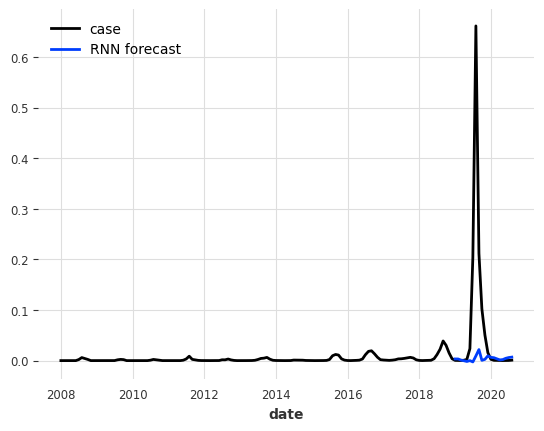

In [ ]:
evaluate_model('RNN', mod_RNN, target, horizon,
               tt[cols[1:-1]], train[cols[1:-1]], refline, ho['case'])

In [ ]:
## LSTM
mod_LSTM = RNNModel(model="LSTM", input_chunk_length=24, training_length=24, n_epochs=100, dropout = 0.2,
  optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 5e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                    #  pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}
                    force_reset=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

LSTM : 0.1607333677787835


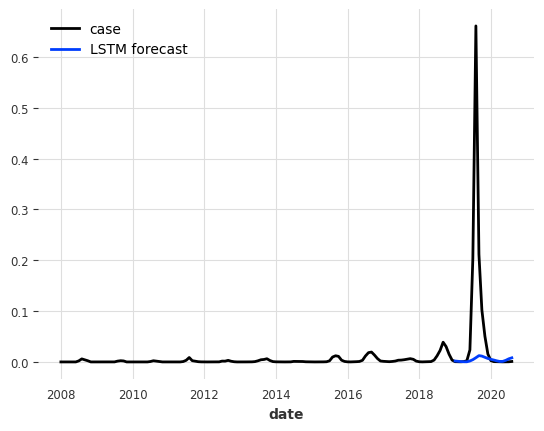

In [ ]:
evaluate_model("LSTM", mod_LSTM, target, horizon,
               tt[cols[1:-1]], train[cols[1:-1]], refline, ho['case'])


I'm also going to test these models on short input chunk lengths for good measure.

In [ ]:
mod_LSTMs = RNNModel(model="LSTM", input_chunk_length=2, training_length=6, n_epochs=100, dropout = 0.2,
  optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 5e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                    #  pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}
                    force_reset=True)
mod_RNNs = RNNModel(model="LSTM", input_chunk_length=2, training_length=6, n_epochs=100, dropout = 0.2,
  optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 5e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                    #  pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}
                    force_reset=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

LSTM short : 0.14779293616151473


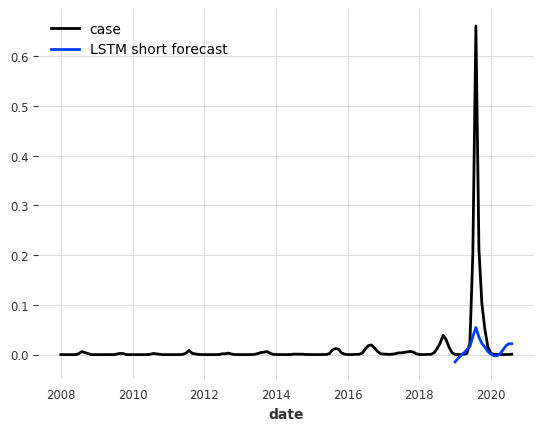

In [ ]:
evaluate_model("LSTM short", mod_LSTMs, target, horizon,
               tt[cols[1:-1]], train[cols[1:-1]], refline, ho['case'])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNN short : 0.1532651963124474


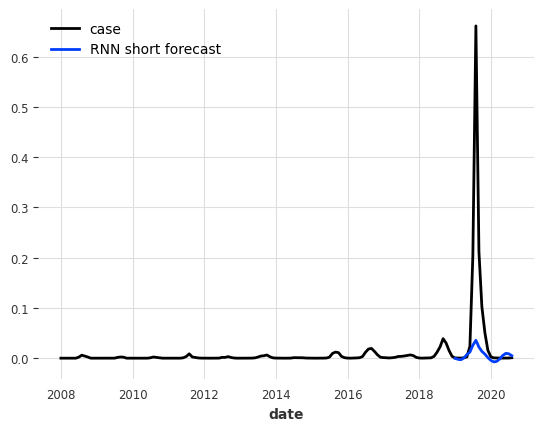

In [ ]:
evaluate_model("RNN short", mod_RNNs, target, horizon,
               tt[cols[1:-1]], train[cols[1:-1]], refline, ho['case'])

# Testing

Okay let's see how these do on the test set.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNN : 0.26267239213579147


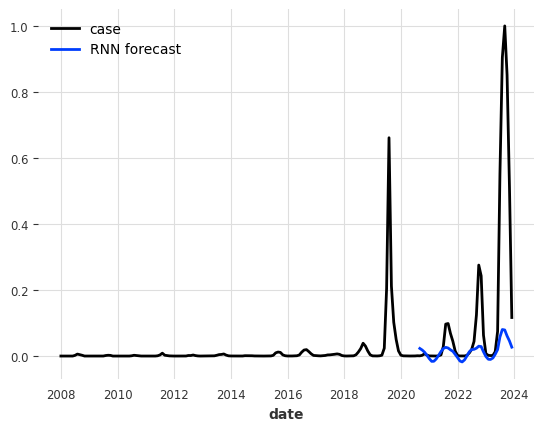

In [ ]:
evaluate_model('RNN', mod_RNNs, refline, len(test),
               train[cols[1:-1]], series[cols[1:-1]], series['case'], test['case'])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

LSTM : 0.20976177930340908


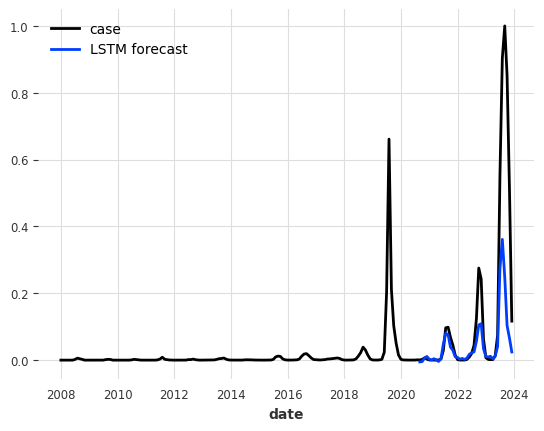

In [ ]:
evaluate_model('LSTM', mod_LSTMs, refline, len(test),
               train[cols[1:-1]], series[cols[1:-1]], series['case'], test['case'])

For comparison, here are the baselines

NaiveSeasonal : 0.25934388226719435
ARIMA : 0.21503816971542017


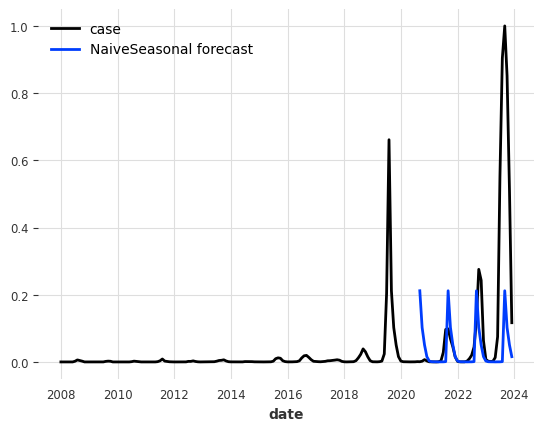

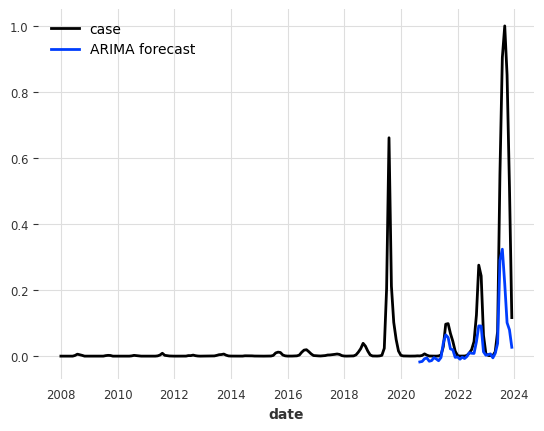

In [ ]:
evaluate_model_plain("NaiveSeasonal", NaiveSeasonal(K=12),
                     train, len(test), series['case'], test['case'])

evaluate_model("ARIMA", mod_ARIMA, refline, len(test),
               train[cols[1:-1]], series[cols[1:-1]], series['case'], test['case'])

# Forecasting

Now we generate a forecast ...
for this we need more weather data

In [ ]:
def forecast_cov(name, model, target, horizon):
  fitted_model = model.fit(target)
  preds = fitted_model.predict(horizon)
  plt.figure()
  preds.plot(label=name+" forecast", low_quantile=0.10, high_quantile=0.90)
  plt.legend()
  return preds

In [ ]:
cov_LSTM = RNNModel(model="LSTM", input_chunk_length=24, training_length=24, n_epochs=100, dropout=.2, optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 5e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                   #pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]},
                    force_reset=True)

cov_RNN = RNNModel(input_chunk_length=6, training_length=18, n_epochs=100, dropout=.1, optimizer_cls = torch.optim.Adam,
  optimizer_kwargs={'lr': 7e-4},
  lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
  lr_scheduler_kwargs={'monitor': 'train_loss'},
                   pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}, force_reset=True)

In [ ]:
def forecast(name, model, target, horizon, fitcovs, predcovs, refline):
  fitted_model = model.fit(target,future_covariates=fitcovs)
  preds = fitted_model.predict(horizon,future_covariates=predcovs)
  plt.figure()
  refline.plot()
  preds['case'].plot(label=name+" forecast", low_quantile=0.10, high_quantile=0.90)
  plt.legend()
  return preds

In [ ]:
preds_cov_RNN = forecast_cov("RNN", cov_RNN, series[cols[1:-1]], 12)
RNN_forecast = forecast('RNN', mod_RNN, series['case'], 12,
               series[cols[1:-1]], series[cols[1:-1]].concatenate(preds_cov_RNN), series['case'])

In [ ]:
RNN_forecast * case_max

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.1 K  | train
6 | V               | Linear           | 104    | train
-------------------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 3.2 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

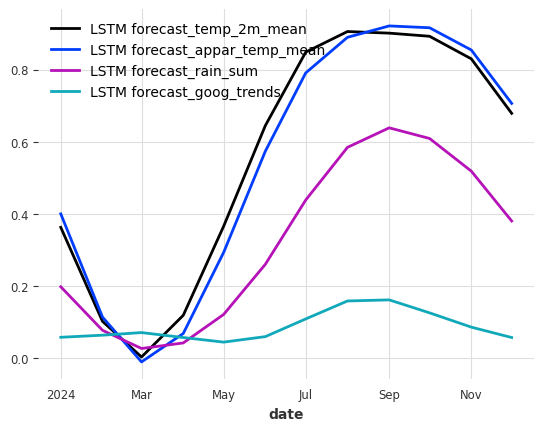

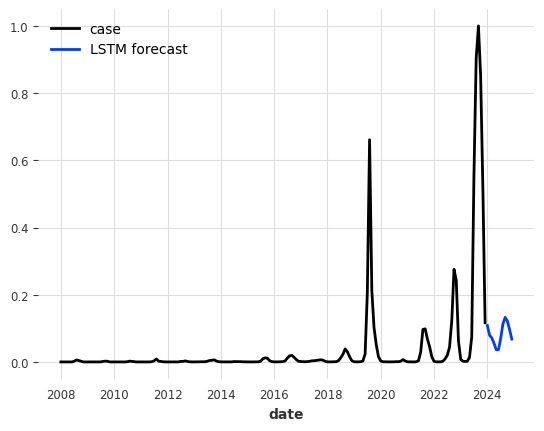

In [ ]:
preds_cov_LSTM = forecast_cov("LSTM", cov_LSTM, series[cols[1:-1]], 12)

LSTM_forecast = forecast('LSTM', mod_LSTM, series['case'], 12,
               series[cols[1:-1]], series[cols[1:-1]].concatenate(preds_cov_LSTM), series['case'])

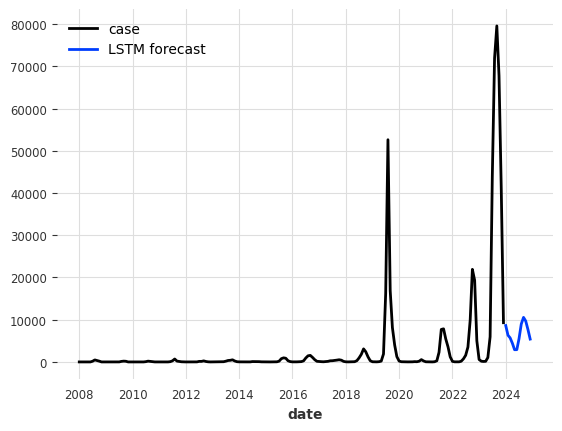

In [ ]:
plt.figure()
(series['case']*case_max).plot()
(LSTM_forecast*case_max).plot(label="LSTM forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()

In [ ]:
LSTM_forecast * case_max

<TimeSeries (DataArray) (date: 12, component: 1, sample: 1)> Size: 96B
array([[[ 8618.0041392 ]],

       [[ 6314.3722302 ]],

       [[ 5701.56457101]],

       [[ 4423.99533423]],

       [[ 2890.63352017]],

       [[ 2906.70325664]],

       [[ 5480.18565508]],

       [[ 8970.16574914]],

       [[10552.85866194]],

       [[ 9683.93347709]],

       [[ 7643.14712726]],

       [[ 5409.86956234]]])
Coordinates:
  * date       (date) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01
  * component  (component) object 8B 'case'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
best_est = preds_cov_LSTM

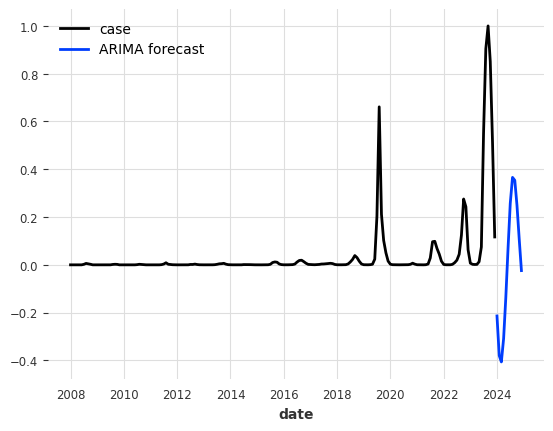

In [ ]:
ARIMA_forecast = forecast('ARIMA', mod_ARIMA, series['case'], 12,
               series[cols[1:-1]], series[cols[1:-1]].concatenate(best_est), series['case'])

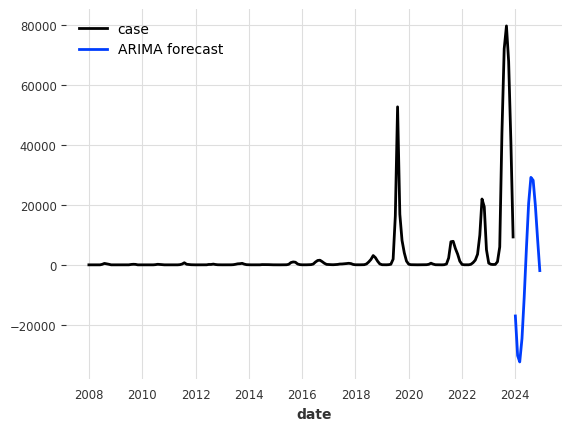

In [ ]:
plt.figure()
(series['case']*case_max).plot()
(ARIMA_forecast*case_max).plot(label="ARIMA forecast", low_quantile=0.10, high_quantile=0.90)
plt.legend()